# Part I. Unification of data files

In [58]:
# Import the necessary libraries
import os
import glob
import pandas as pd
import re
import shutil

In [59]:
# Create a dictionary with Polish names of moths and corresponding numbers
months = {
    'styczeń': '01',
    'luty': '02',
    'marzec': '03',
    'kwiecień': '04',
    'maj': '05',
    'czerwiec': '06',
    'lipiec': '07',
    'sierpień': '08',
    'wrzesień': '09',
    'październik': '10',
    'listopad': '11',
    'grudzień': '12'
}

In [60]:
# Create list of files in "all_files" folder
all_files = os.listdir('all_files')

# Then we create "list.txt" containing filenames
with open('filenames_list.txt', 'w') as file:
    file.write('\n'.join(all_files))

# We iterate through each file in "all_files"
for filename in all_files:
    # and change all names for lowercase
    new_filename = filename.lower()
    os.rename(os.path.join('all_files', filename), os.path.join('all_files', new_filename))

In [61]:
# All month names are converted to numbers
all_files = 'all_files'
for filename in os.listdir(all_files):
    file_path = os.path.join(all_files, filename)
    if os.path.isfile(file_path):
        file_name, file_ext = os.path.splitext(filename)
        for key in months:
            if key in file_name.lower():
                new_file_name = file_name.replace(key, months[key])
                new_file_name = new_file_name + file_ext
                new_file_path = os.path.join(all_files, new_file_name)
                os.rename(file_path, new_file_path)
                break

In [62]:
# All spacese " " are converted to "-"
for filename in os.listdir(all_files):
    file_path = os.path.join(all_files, filename)
    if os.path.isfile(file_path):
        new_filename = filename.replace(" ", "-")
        new_file_path = os.path.join(all_files, new_filename)
        os.rename(file_path, new_file_path)

In [63]:
# Delete "analiza-rynku-maszyn-budowlanych-2018---" from file names

all_files = 'all_files'

for filename in os.listdir(all_files):
    file_path = os.path.join(all_files, filename)
    if os.path.isfile(file_path):
        if filename.startswith("analiza-rynku-maszyn-budowlanych-2018---"):
            new_filename = filename.replace("analiza-rynku-maszyn-budowlanych-2018---", "analiza-rynku-maszyn-budowlanych-")
            new_file_path = os.path.join(all_files, new_filename)
            os.rename(file_path, new_file_path)

In [64]:
# Remove all other unnecessary characters from filenames

# path to "all_files" folder
folder_path = "all_files"

# If "new_files" doesn't exist,  we create it
new_folder_path = "new_files"
os.makedirs(new_folder_path, exist_ok=True)

# Loop iterating through files in the "all_files" folder
for filename in os.listdir(folder_path):
    old_file_path = os.path.join(folder_path, filename)
    
    if os.path.isfile(old_file_path):
        # we remove all characters from the file name that are not numbers,  "-" or "."
        new_filename = re.sub(r'[^\d\-.]', '', filename)
        
        if new_filename:
            
            # creating new file name
            new_filename = f"{new_filename}.xlsx"
            
            # creating path for the new file in "new_files" folder
            new_file_path = os.path.join(new_folder_path, new_filename)
            
            # Copying the original file to the "new_files" folder with a new name
            shutil.copy2(old_file_path, new_file_path)
            print(f"File {filename} copied as {new_filename}.")
        else:
            print(f"The {filename} file does not contain any numbers, '-' or '.' and will not be copied.")

print("The process of creating copies of files with only numbers, '-' and '.' in their names has been completed.")

File d&b-panel-sell-in-09-2011.xlsx copied as ----09-2011..xlsx.
File db-panel-sell-in-08-2015.xlsx copied as ----08-2015..xlsx.
File _analiza-rynku-maszyn-budowlanych-2023-10.xlsx copied as ----2023-10..xlsx.
File analiza-rynku-maszyn-budowlanych-12-2018.xlsx copied as ----12-2018..xlsx.
File db-panel-sell-in-10-2013.xlsx copied as ----10-2013..xlsx.
File d&b-panel-sell-in-07-2009.xlsx copied as ----07-2009..xlsx.
File _analiza-rynku-maszyn-budowlanych-2023-06.xlsx copied as ----2023-06..xlsx.
File d&b-panel-sell-in-02-2010.xlsx copied as ----02-2010..xlsx.
File analiza-rynku-maszyn-budowlanych-06-2018.xlsx copied as ----06-2018..xlsx.
File db-panel-sell-in-03-2014.xlsx copied as ----03-2014..xlsx.
File d&b-panel-sell-in-01-2012.xlsx copied as ----01-2012..xlsx.
File _analiza-rynku-maszyn-budowlanych-2022-07.xlsx copied as ----2022-07..xlsx.
File analiza-rynku-maszyn-budowlanych-2019-09.xlsx copied as ----2019-09..xlsx.
File analiza-rynku-maszyn-budowlanych-2019-06-v2.xlsx copied as -

In [65]:
# Standarize file names, taking into account the possibility of repeating file versions

# path to "new_files" folder
folder_path = "new_files"

# Loop iterating through files in the "new_files" folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    
    if os.path.isfile(file_path):
        # Finding a string of 4 digits in the file name and savig it in to the "year" variable
        match_year = re.search(r'\d{4}', filename)
        if match_year:
            year = match_year.group()
        else:
            continue
        
        # Finding a string of 2 digits with no other digits before or after them and storing them in the "month" variable
        match_month = re.search(r'(?<=\D)\d{2}(?=\D)', filename)
        if match_month:
            month = match_month.group()
        else:
            continue
        
        # Making new, unified file name
        new_filename = f"analiza_mb_{year}_{month}.xlsx"
        
        # Making path for new file in "new_files" folder
        new_file_path = os.path.join(folder_path, new_filename)
        
        # If a file with the new name already exists, skip the iteration
        if os.path.exists(new_file_path):
            print(f"A file named {new_filename} already exists. I skip the iteration.")
            continue
        
        # Changing the file name
        os.rename(file_path, new_file_path)
        print(f"Renamed {filename} to {new_filename}.")

print("The file renaming process is complete.")


Renamed ----11-2013..xlsx to analiza_mb_2013_11.xlsx.
Renamed ----04-2018..xlsx to analiza_mb_2018_04.xlsx.
Renamed ----06.2018-..xlsx to analiza_mb_2018_06.xlsx.
Renamed ----08.-2018..xlsx to analiza_mb_2018_08.xlsx.
Renamed ----08-2017..xlsx to analiza_mb_2017_08.xlsx.
Renamed ----2023-01..xlsx to analiza_mb_2023_01.xlsx.
Renamed ----2022-01..xlsx to analiza_mb_2022_01.xlsx.
Renamed ----05-2015..xlsx to analiza_mb_2015_05.xlsx.
Renamed ----07-2016..xlsx to analiza_mb_2016_07.xlsx.
Renamed ----05-2017..xlsx to analiza_mb_2017_05.xlsx.
Renamed ----2021-04-2..xlsx to analiza_mb_2021_04.xlsx.
Renamed ----2023-03..xlsx to analiza_mb_2023_03.xlsx.
Renamed ----2022-03..xlsx to analiza_mb_2022_03.xlsx.
Renamed ----09-2018..xlsx to analiza_mb_2018_09.xlsx.
Renamed ----2019-09..xlsx to analiza_mb_2019_09.xlsx.
Renamed ----02-2009..xlsx to analiza_mb_2009_02.xlsx.
Renamed ----2020-12-2..xlsx to analiza_mb_2020_12.xlsx.
Renamed ----08-2015..xlsx to analiza_mb_2015_08.xlsx.
Renamed ----2019-07-2.

# Part II. DataFrame creation and preparing data

In [67]:
# function returning DataFrame object from MS Excell file

def create_new_df(filename, sheet):

    filepath = f'new_files/{filename}' 
    df = pd.read_excel(filepath, sheet_name=sheet, header=None)
    
    # Extracting the year and month from a file name
    parts = filename.split("_")
    year = parts[2]
    month = parts[3].split(".")[0]
    
    new_df = pd.DataFrame()

    for index in range(5, 19):        
        vovoidship = df.iloc[index, 0]
        
        # Searching for a row with "HYUNDAI" in column 0
        hyundai_rows = df[df[0].str.contains('HYUNDAI', case=False, na=False)].index

        
        # wheel excavators section        
        if len(hyundai_rows) > 0:
            hyundai_row = hyundai_rows[0]
        else:
            # handling the case where the "HYUNDAI" row was not found
            continue

        data = {
            'year': [year] * 5,
            'month': [month] * 5,
            'vovoidship': [vovoidship] * 5,
            'type': [df.iloc[0, 0]] * 5,
            'section': df.iloc[2, 1:6].values,
            'Hyundai': df.iloc[hyundai_row, 1:6].values,
            'quantity': df.iloc[index, 1:6].values
        }
        temp_df = pd.DataFrame(data)
        new_df = pd.concat([new_df, temp_df])

        # miniexcavator section

        # Searching for a row with "HYUNDAI" in column 8
        hyundai_rows = df[df[8].str.contains('HYUNDAI', case=False, na=False)].index

        if len(hyundai_rows) > 0:
            hyundai_row = hyundai_rows[0]
        else:
            # handling the case where the "HYUNDAI" row was not found
            continue
        
        data = {
            'year': [year] * 5,
            'month': [month] * 5,
            'vovoidship': [vovoidship] * 5,
            'type': [df.iloc[0, 8]] * 5,
            'section': df.iloc[2, 9:14].values,
            'Hyundai': df.iloc[hyundai_row, 9:14].values,
            'quantity': df.iloc[index, 9:14].values
        }
        temp_df = pd.DataFrame(data)
        new_df = pd.concat([new_df, temp_df])

        # midiexcavator section
        
        # Searching for a row with "HYUNDAI" in column 16
        hyundai_rows = df[df[16].str.contains('HYUNDAI', case=False, na=False)].index

        if len(hyundai_rows) > 0:
            hyundai_row = hyundai_rows[0]
        else:
            # handling the case where the "HYUNDAI" row was not found
            continue
        
        
        data = {
            'year': [year] * 7,
            'month': [month] * 7,
            'vovoidship': [vovoidship] * 7,
            'type': [df.iloc[0, 16]] * 7,
            'section': df.iloc[2, 17:24].values,
            'Hyundai': df.iloc[hyundai_row, 17:24].values,
            'quantity': df.iloc[index, 17:24].values
        }
        temp_df = pd.DataFrame(data)
        new_df = pd.concat([new_df, temp_df])

        # Searching for a row with "HYUNDAI" in column 26
        hyundai_rows = df[df[26].str.contains('HYUNDAI', case=False, na=False)].index

        if len(hyundai_rows) > 0:
            hyundai_row = hyundai_rows[0]
        else:
            # handling the case where the "HYUNDAI" row was not found
            continue

        
        # crawler section
        data = {
            'year': [year] * 7,
            'month': [month] * 7,
            'vovoidship': [vovoidship] * 7,
            'type': [df.iloc[0, 26]] * 7,
            'section': df.iloc[2, 27:34].values,
            'Hyundai': df.iloc[hyundai_row, 27:34].values,
            'quantity': df.iloc[index, 27:34].values
        }
        temp_df = pd.DataFrame(data)
        new_df = pd.concat([new_df, temp_df])

        # loader section
        
        # Searching for a row with "HYUNDAI" in column 46
        hyundai_rows = df[df[46].str.contains('HYUNDAI', case=False, na=False)].index

        if len(hyundai_rows) > 0:
            hyundai_row = hyundai_rows[0]
        else:
            # handling the case where the "HYUNDAI" row was not found 
            continue

        
        data = {
            'year': [year] * 6,
            'month': [month] * 6,
            'vovoidship': [vovoidship] * 6,
            'type': [df.iloc[0, 46]] * 6,
            'section': df.iloc[2, 47:53].values,
            'Hyundai': df.iloc[hyundai_row, 47:53].values,
            'quantity': df.iloc[index, 47:53].values
        }
        temp_df = pd.DataFrame(data)
        new_df = pd.concat([new_df, temp_df])

    return new_df

# example/test data
sheet = 'sell-in-06'
filename = 'analiza_mb_2022_06.xlsx'

# Creating new DataFrame
result_df = create_new_df(filename, sheet)
print(result_df)


    year month          vovoidship                        type       section  \
0   2022    06           LUBELSKIE              KOPARKI KOŁOWE        < 13 T   
1   2022    06           LUBELSKIE              KOPARKI KOŁOWE     13 < 15 T   
2   2022    06           LUBELSKIE              KOPARKI KOŁOWE     15 < 17 T   
3   2022    06           LUBELSKIE              KOPARKI KOŁOWE     17 < 20 T   
4   2022    06           LUBELSKIE              KOPARKI KOŁOWE        > 20 T   
..   ...   ...                 ...                         ...           ...   
1   2022    06  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)  175 < 200 KM   
2   2022    06  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)  200 < 250 KM   
3   2022    06  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)  250 < 300 KM   
4   2022    06  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)  300 < 350 KM   
5   2022    06  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)      > 350 KM   

                Hyundai quantity  
0   

In [68]:
# Framer function with built-in create_new_df function
def framer(year, month):
    Months = {
        '01': 'Styczeń',
        '02': 'Luty',
        '03': 'Marzec',
        '04': 'Kwiecień',
        '05': 'Maj',
        '06': 'Czerwiec',
        '07': 'Lipiec',
        '08': 'Sierpień',
        '09': 'Wrzesień',
        '10': 'Październik',
        '11': 'Listopad',
        '12': 'Grudzień'
    }
    
    # Creating new file name
    filename = f"analiza_mb_{year}_{month}.xlsx"
    file_path = os.path.join("new_files", filename)
    
    # Checking if file exists
    if not os.path.exists(file_path):
        print(f"Plik {filename} nie istnieje.")
        return
    
    # changing the number to the Polish name of the month
    month_name = Months.get(month)
    
    if month_name is None:
        print(f"Invalid month number: {month}.") 
        return
    
    # looking for a sheet
    found_sheet = False
    try:
        # df = pd.read_excel(file_path, sheet_name=month)
        print(f"1 - {sheet} {month} tab found in file {filename} with data {year}, {month_name}.") #
        return(sheet, filename, year)
        found_sheet = True
    except:
        pass
    
    if not found_sheet:
        month_key = None
        for key, value in Months.items():
            if value == month_name:
                month_key = key
                break
        
        if month_key:
            try:
                df = pd.read_excel(file_path, sheet_name=month_key)
                print(f"2 - Found {month_key} tab (key {month_name}) in file {filename} with data {year}, {month_name}.")
                sheet_name = sheet
                result_df = create_new_df(filename, sheet)
                # print(result_df)
                return(result_df)
                
            except:
                try:
                    df = pd.read_excel(file_path, sheet_name=month_name)
                    print(f"3 - Tab {month_name} (key {month_key}) found in file {filename} with data {year}, {month_name}.")
                    sheet_name = sheet
                    # return(sheet, filename) 
                    # Creating new DataFrame
                    result_df = create_new_df(filename, sheet)
                    # print(result_df)
                    return(result_df)
                    
                except:
                    found_custom_sheet = False
                    for sheet in pd.ExcelFile(file_path).sheet_names:
                        if month in sheet or month_name in sheet:
                            print(f"4 - A {sheet} sheet containing {month} or {month_name} was found in the {filename} file with {year}, {month_name} data.")
                            print(sheet, filename)
                            # Creating new DataFrame
                            result_df = create_new_df(filename, sheet)
                            # print(result_df)
                            return(result_df)
                            found_custom_sheet = True

                    if not found_custom_sheet:
                        print(f"The {year}, {month_name} data tab was not found in the {filename} file.")
                        
# framer(2009, "04")  



In [69]:
# Function that iterates through files and returns a complete dataframe
def iterator():
    folder_path = "new_files"
    
    complete_mb_dataframe = pd.DataFrame()  # Empty DataFrame initialization
    
    for filename in os.listdir(folder_path):
        if filename.startswith("analiza_mb_") and filename.endswith(".xlsx"):
            file_path = os.path.join(folder_path, filename)
            
            # Extracting the year and month from a file name
            parts = filename.split("_")
            year = parts[2]
            month = parts[3].split(".")[0]
            
            print(f"Processing file: {filename}")
            try:
                framer_result = framer(year, month)
                
                if framer_result is not None and isinstance(framer_result, pd.DataFrame):
                    complete_mb_dataframe = pd.concat([complete_mb_dataframe, framer_result], ignore_index=True)
                    
            except Exception as e:
                print(f"Error processing file {filename}: {str(e)}")
                
            print("=" * 50)
                
    print("Complete DataFrame - Top 5 rows:")
    print(complete_mb_dataframe.head())
    
    print("Complete DataFrame - Bottom 5 rows:")
    print(complete_mb_dataframe.tail())
    
    # Save result DataFrame to Excel
    excel_filename = "complete_mb_data.xlsx"
    complete_mb_dataframe.to_excel(excel_filename, index=False)
    print(f"Saved the resulting DataFrame to an Excel file: {excel_filename}")
    
    return complete_mb_dataframe

# Calling iterator function
complete_df = iterator()


Processing file: analiza_mb_2016_07.xlsx
4 - A D&B Panel Sell-in- Lipiec sheet containing 07 or Lipiec was found in the analiza_mb_2016_07.xlsx file with 2016, Lipiec data.
D&B Panel Sell-in- Lipiec analiza_mb_2016_07.xlsx
Processing file: analiza_mb_2011_03.xlsx
4 - A D&B Panel Sell-in- Marzec sheet containing 03 or Marzec was found in the analiza_mb_2011_03.xlsx file with 2011, Marzec data.
D&B Panel Sell-in- Marzec analiza_mb_2011_03.xlsx
Processing file: analiza_mb_2012_05.xlsx
4 - A D&B Panel Sell-in- Maj sheet containing 05 or Maj was found in the analiza_mb_2012_05.xlsx file with 2012, Maj data.
D&B Panel Sell-in- Maj analiza_mb_2012_05.xlsx
Processing file: analiza_mb_2015_01.xlsx
4 - A D&B Panel Sell-in- Styczeń sheet containing 01 or Styczeń was found in the analiza_mb_2015_01.xlsx file with 2015, Styczeń data.
D&B Panel Sell-in- Styczeń analiza_mb_2015_01.xlsx
Processing file: analiza_mb_2016_11.xlsx
4 - A D&B Panel Sell-in- Listopad sheet containing 11 or Listopad was found

# Part III. EDA

In [5]:
# Loading useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

## Data summary:

In [7]:
# Display the first few rows of the complete dataframe
complete_df = pd.read_excel("complete_mb_data.xlsx")
complete_df.head()

,year,month,vovoidship,type,section,Hyundai,quantity
0,2016,7,LUBELSKIE,KOPARKI KOŁOWE,< 13 T,R55W-9A,0.0
1,2016,7,LUBELSKIE,KOPARKI KOŁOWE,13 < 15 T,R140W-9A / HW140,0.0
2,2016,7,LUBELSKIE,KOPARKI KOŁOWE,15 < 17 T,R160W-9A,0.0
3,2016,7,LUBELSKIE,KOPARKI KOŁOWE,17 < 20 T,R180W-9A/ HW180,0.0
4,2016,7,LUBELSKIE,KOPARKI KOŁOWE,> 20 T,R210W-9A/ HW210,0.0


In [8]:
# Display the last 5 rows of the dataframe
complete_df.tail()

,year,month,vovoidship,type,section,Hyundai,quantity
72725,2020,8,ZACHODNIOPOMORSKIE,ŁADOWARKI KOŁOWE (>150KM),175 < 200 KM,HL955A,0.0
72726,2020,8,ZACHODNIOPOMORSKIE,ŁADOWARKI KOŁOWE (>150KM),200 < 250 KM,HL960A,0.0
72727,2020,8,ZACHODNIOPOMORSKIE,ŁADOWARKI KOŁOWE (>150KM),250 < 300 KM,HL965,1.0
72728,2020,8,ZACHODNIOPOMORSKIE,ŁADOWARKI KOŁOWE (>150KM),300 < 350 KM,HL970A / HL975A CTV,0.0
72729,2020,8,ZACHODNIOPOMORSKIE,ŁADOWARKI KOŁOWE (>150KM),> 350 KM,HL980A,0.0


In [9]:
# Display information about the complete_df DataFrame, including the index dtype and column dtypes, non-null values, and memory usage
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72730 entries, 0 to 72729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        72730 non-null  int64  
 1   month       72730 non-null  int64  
 2   vovoidship  72730 non-null  object 
 3   type        72730 non-null  object 
 4   section     72730 non-null  object 
 5   Hyundai     58828 non-null  object 
 6   quantity    64742 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 3.9+ MB


In [10]:
# Display descriptive statistics of the complete_df DataFrame
complete_df.describe()

,year,month,quantity
count,72730.000000,72730.000000,64742.000000
mean,2015.975938,6.491819,0.336072
std,4.275257,3.474346,1.109111
min,2009.000000,1.000000,-1.000000
25%,2012.000000,3.000000,0.000000
50%,2016.000000,7.000000,0.000000
75%,2020.000000,9.000000,0.000000
max,2023.000000,12.000000,34.000000


In [11]:
# Check the shape of the complete_df dataframe
complete_df.shape

(72730, 7)

In [12]:
# # Changing datatypes
# complete_df['year'] = complete_df['year'].astype(int)
# complete_df['month'] = complete_df['month'].astype(int)
# complete_df['quantity'] = complete_df['year'].astype(int)
# complete_df.info()

## Handling missig values

Text(0, 0.5, 'Sample Number')

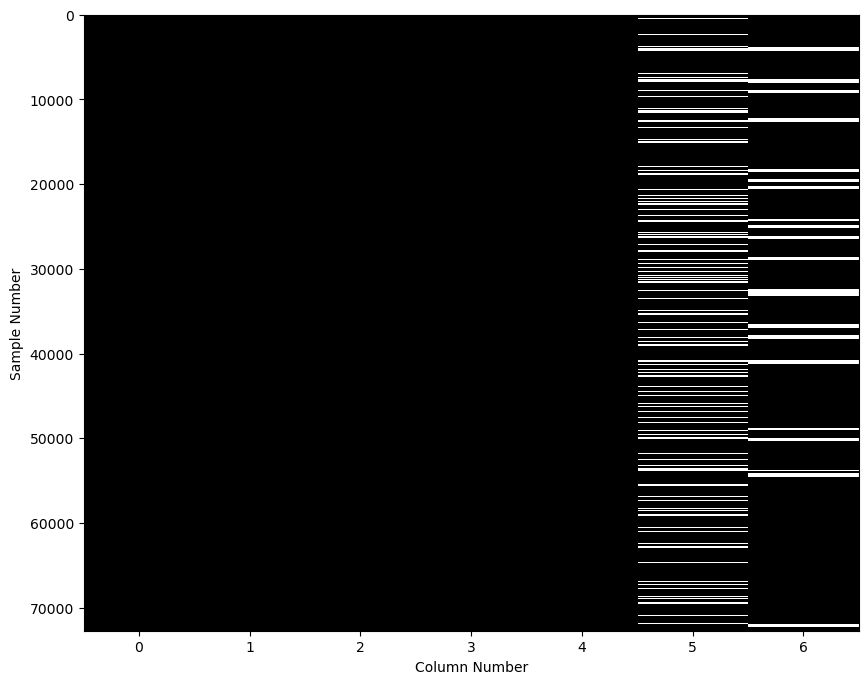

In [14]:
plt.figure(figsize=(10,8))
plt.imshow(complete_df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

<Axes: title={'center': 'Percantage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

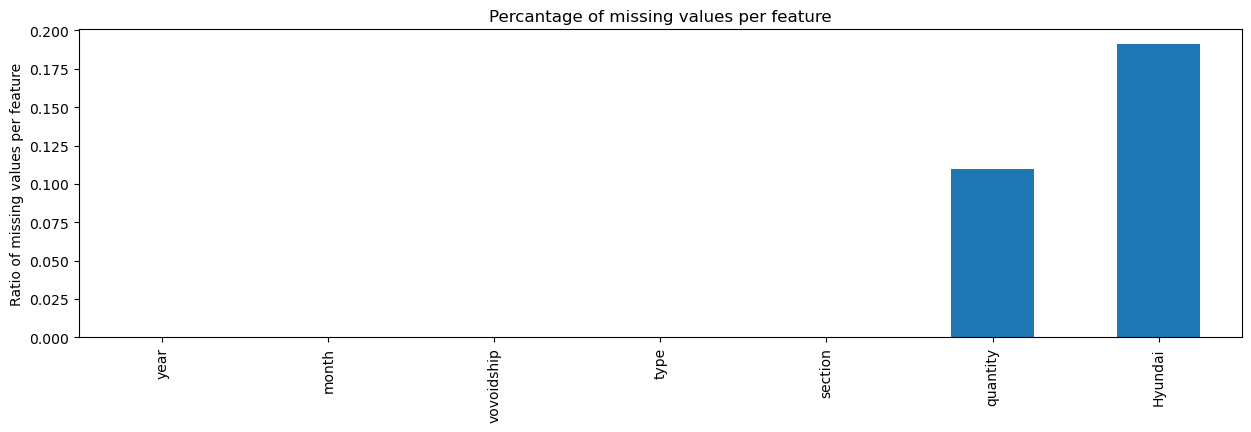

In [15]:
complete_df.isna().mean().sort_values().plot(kind="bar", figsize=(15,4), title="Percantage of missing values per feature", ylabel="Ratio of missing values per feature")

In [16]:
# Identify columns with missing values
columns_with_missing = complete_df.columns[complete_df.isnull().any()].tolist()

# Choose columns for imputation
columns_to_impute = ['quantity']

# Convert columns to numeric type if needed
complete_df[columns_to_impute] = complete_df[columns_to_impute].apply(pd.to_numeric, errors='coerce')

# Create an instance of the SimpleImputer for categorical data
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Perform imputation on the selected columns
complete_df[columns_to_impute] = imputer_categorical.fit_transform(complete_df[columns_to_impute])

# Print the DataFrame after imputation
print(complete_df)

       year  month          vovoidship                        type  \
0      2016      7           LUBELSKIE              KOPARKI KOŁOWE   
1      2016      7           LUBELSKIE              KOPARKI KOŁOWE   
2      2016      7           LUBELSKIE              KOPARKI KOŁOWE   
3      2016      7           LUBELSKIE              KOPARKI KOŁOWE   
4      2016      7           LUBELSKIE              KOPARKI KOŁOWE   
...     ...    ...                 ...                         ...   
72725  2020      8  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)   
72726  2020      8  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)   
72727  2020      8  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)   
72728  2020      8  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)   
72729  2020      8  ZACHODNIOPOMORSKIE  ŁADOWARKI KOŁOWE  (>150KM)   

            section              Hyundai  quantity  
0            < 13 T              R55W-9A       0.0  
1         13 < 15 T     R140W-9A / HW140       0.0  


Text(0, 0.5, 'Sample Number')

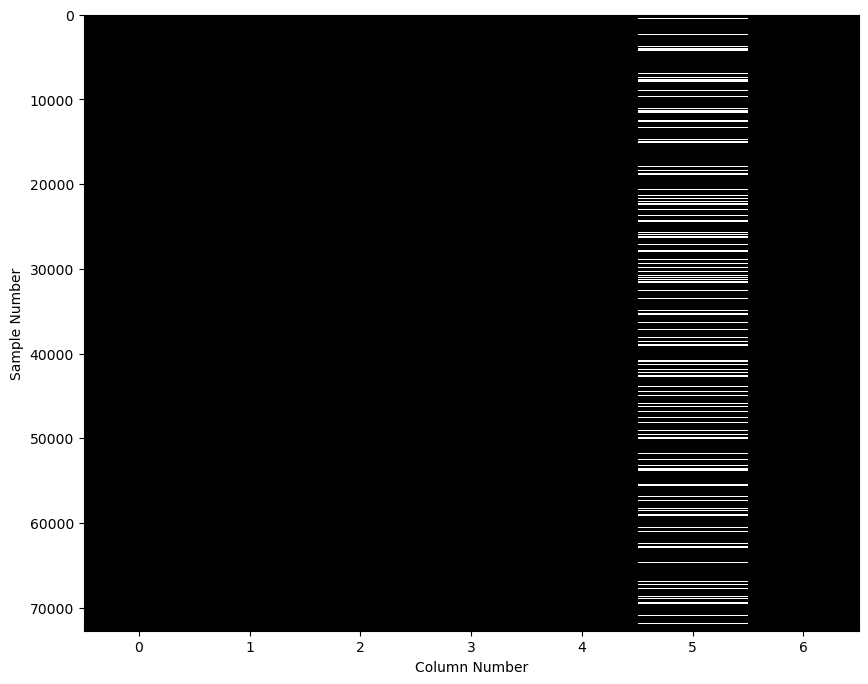

In [17]:
plt.figure(figsize=(10,8))
plt.imshow(complete_df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

In [18]:
# Fill missing values in the 'Hyundai' column

complete_df['Hyundai'].fillna('Other', inplace=True)

Text(0, 0.5, 'Sample Number')

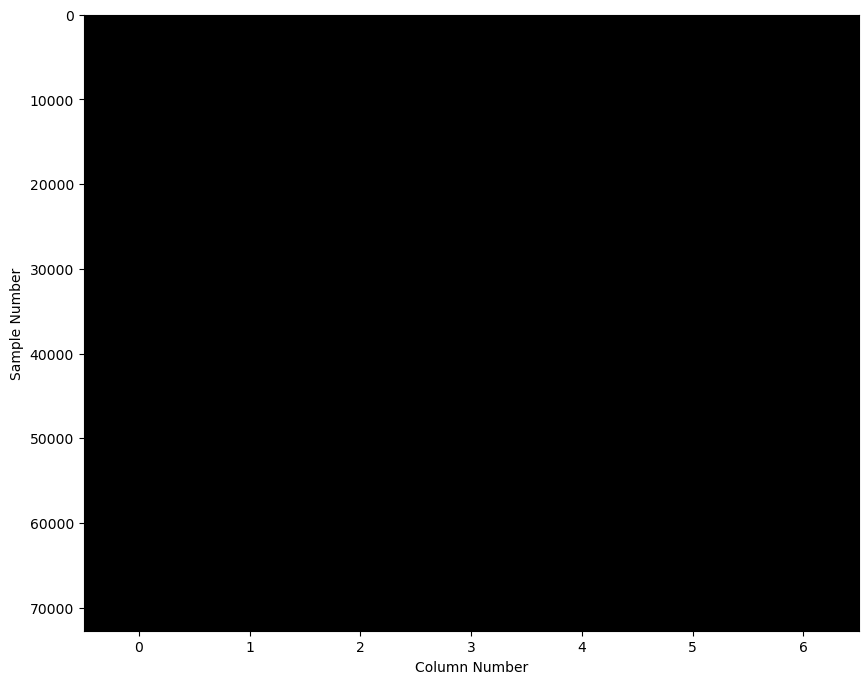

In [19]:
# Looking if there are any missing values left

plt.figure(figsize=(10,8))
plt.imshow(complete_df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

In [20]:
# Look for unique categorical values to inspect data concistancy

for type_group, group_df in complete_df.groupby('type'):
    # Print the unique values in the 'section' column for the current 'type'
    unique_sections = group_df['section'].unique()
    print(f"Type: {type_group}\nUnique Sections: {unique_sections}\n")

Type: KOPARKI GĄSIENICOWE
Unique Sections: ['28 < 33 T' '33 < 40 T' '40 < 50 T' '50 < 66 T' '66 < 90 T' '90 < 150 T'
 '> 150 T' '33 < 4 T' '4 < 5 T' '5 < 66 T' '66 < 9 T' '9 < 15 T' '> 15 T']

Type: KOPARKI KOŁOWE
Unique Sections: ['< 13 T' '13 < 15 T' '15 < 17 T' '17 < 20 T' '> 20 T' '17 < 2 T' '> 2 T']

Type: MAŁE I ŚREDNIE KOPARKI GĄSIENICOWE
Unique Sections: ['6 < 8T' '8 < 12 T' '12 < 14 T' '14 < 19  T' '19 < 21 T' '21 < 24 T'
 '24 < 28 T']

Type: MINI-KOPARKI GĄSIENICOWE
Unique Sections: ['0 < 1 T' '1 < 2 T' '2 < 3 T' '3 < 4 T' '4 T < ' ' < 1 T']

Type: ŁADOWARKI KOŁOWE  (>150KM)
Unique Sections: ['14-16 T' '16-19 T' '19-22 T' '22 - 25 T' '25-40 T' '>40 T'
 '150 < 175 KM' '175 < 200 KM' '200 < 250 KM' '250 < 300 KM'
 '300 < 350 KM' '> 350 KM']

Type: ŁADOWARKI KOŁOWE  (>15KM)
Unique Sections: ['15 < 175 KM' '175 < 2 KM' '2 < 25 KM' '25 < 3 KM' '3 < 35 KM' '> 35 KM']



In [21]:
# Make corrections to section column based on specified conditions
corrections = {
    'KOPARKI GĄSIENICOWE': {
        '33 < 4 T': '33 < 40 T',
        '4 < 5 T': '40 < 50 T',
        '5 < 66 T': '50 < 66 T',
        '66 < 9 T': '66 < 90 T',
        '9 < 15 T': '90 < 150 T',
        '> 15 T': '> 150 T'
    },
    'KOPARKI KOŁOWE': {
        '17 < 2 T': '17 < 20 T',
        '> 2 T': '> 20 T'
    },
    'ŁADOWARKI KOŁOWE  (>150KM)': {
        '14-16 T': '150 < 175 KM',
        '16-19 T': '175 < 200 KM',
        '19-22 T': '200 < 250 KM',
        '22 - 25 T': '250 < 300 KM',
        '25-40 T': '300 < 350 KM',
        '>40 T': '> 350 KM'
    },
    'ŁADOWARKI KOŁOWE  (>15KM)': {
        '15 < 175 KM': '150 < 175 KM',
        '175 < 2 KM': '175 < 200 KM',
        '2 < 25 KM': '200 < 250 KM',
        '25 < 3 KM': '250 < 300 KM',
        '3 < 35 KM': '300 < 350 KM',
        '> 35 KM': '> 350 KM'
    }
}

# Apply the corrections to the dataframe
for type, corrections_dict in corrections.items():
    mask = complete_df['type'] == type
    for old_value, new_value in corrections_dict.items():
        complete_df.loc[mask & (complete_df['section'] == old_value), 'section'] = new_value

# Change type from ŁADOWARKI KOŁOWE  (>15KM) to ŁADOWARKI KOŁOWE  (>150KM)
complete_df['type'] = complete_df['type'].str.replace('ŁADOWARKI KOŁOWE  (>15KM)', 'ŁADOWARKI KOŁOWE  (>150KM)')

In [22]:
# Look again for unique categorical values to inspect data concistancy

for type_group, group_df in complete_df.groupby('type'):
    # Print the unique values in the 'section' column for the current 'type'
    unique_sections = group_df['section'].unique()
    print(f"Type: {type_group}\nUnique Sections: {unique_sections}\n")

Type: KOPARKI GĄSIENICOWE
Unique Sections: ['28 < 33 T' '33 < 40 T' '40 < 50 T' '50 < 66 T' '66 < 90 T' '90 < 150 T'
 '> 150 T']

Type: KOPARKI KOŁOWE
Unique Sections: ['< 13 T' '13 < 15 T' '15 < 17 T' '17 < 20 T' '> 20 T']

Type: MAŁE I ŚREDNIE KOPARKI GĄSIENICOWE
Unique Sections: ['6 < 8T' '8 < 12 T' '12 < 14 T' '14 < 19  T' '19 < 21 T' '21 < 24 T'
 '24 < 28 T']

Type: MINI-KOPARKI GĄSIENICOWE
Unique Sections: ['0 < 1 T' '1 < 2 T' '2 < 3 T' '3 < 4 T' '4 T < ' ' < 1 T']

Type: ŁADOWARKI KOŁOWE  (>150KM)
Unique Sections: ['150 < 175 KM' '175 < 200 KM' '200 < 250 KM' '250 < 300 KM'
 '300 < 350 KM' '> 350 KM']



# Part IV. DATA VISUALISATION

In [24]:
# Convert 'year' and 'month' to datetime for better plotting
complete_df['date'] = pd.to_datetime(complete_df[['year', 'month']].assign(DAY=1))

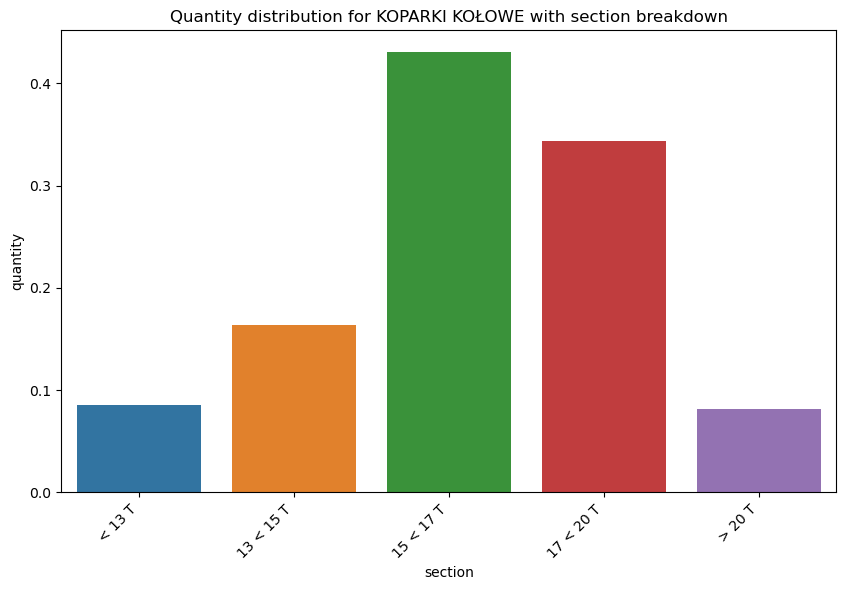

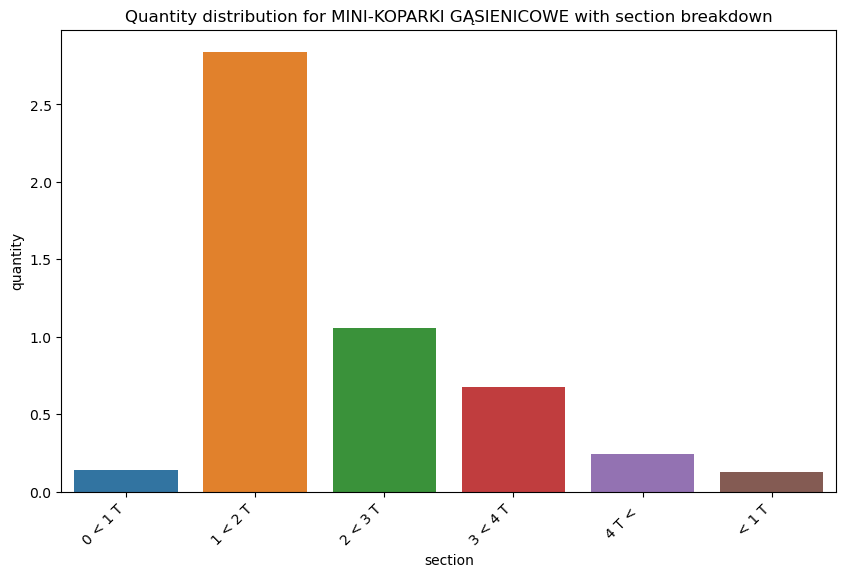

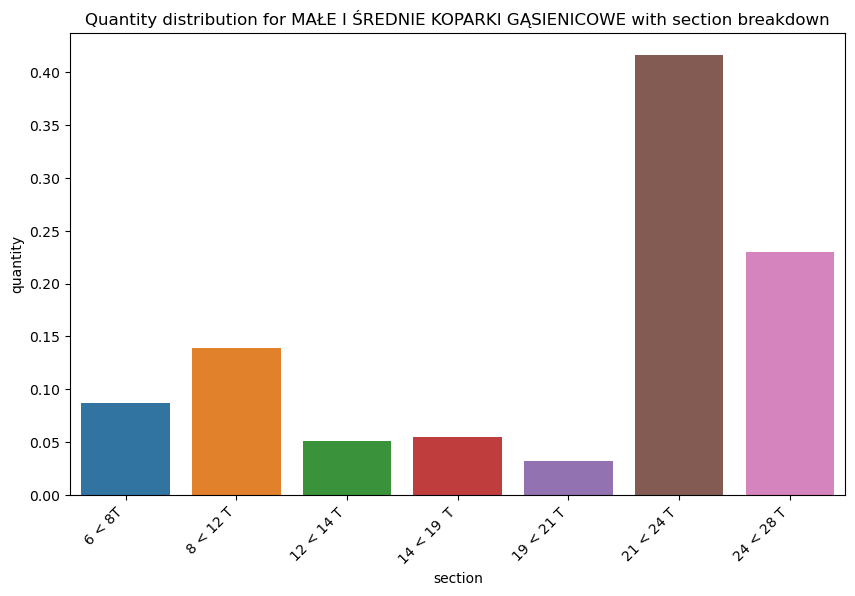

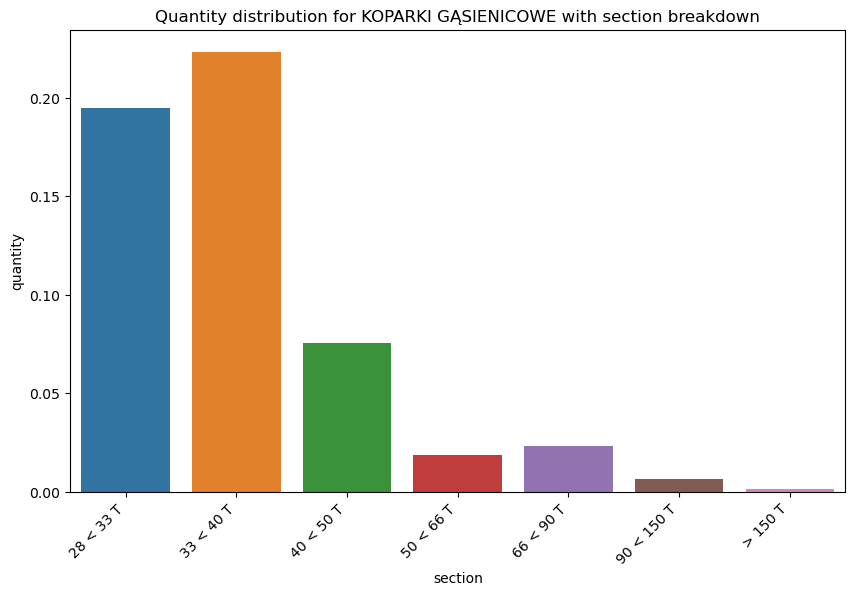

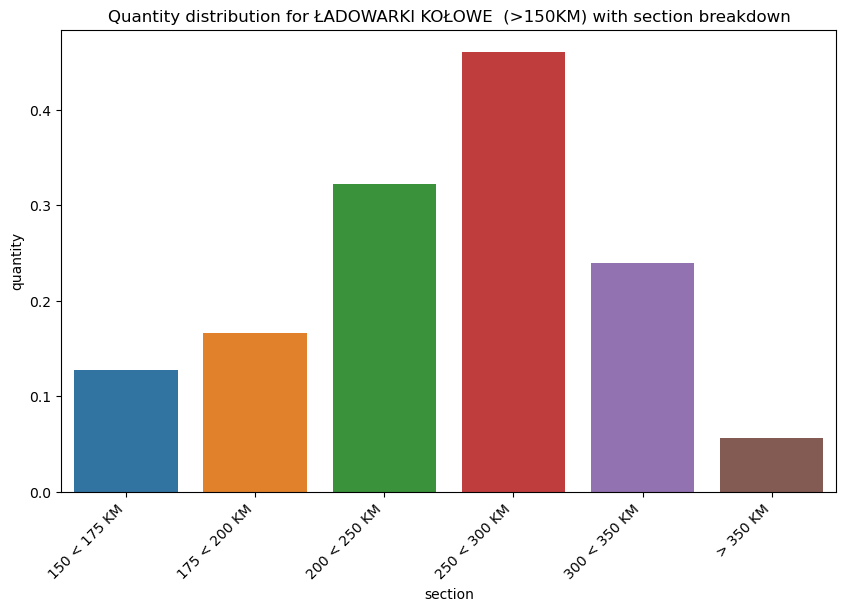

In [25]:
# Get unique equipment types
unique_types = complete_df['type'].unique()

# Create individual bar plots for each equipment type
for equipment_type in unique_types:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='section', y='quantity', data=complete_df[complete_df['type'] == equipment_type], errorbar=None)
    plt.title(f'Quantity distribution for {equipment_type} with section breakdown')
    plt.xticks(rotation=45, ha='right')
    plt.show()

<Figure size 1200x800 with 0 Axes>

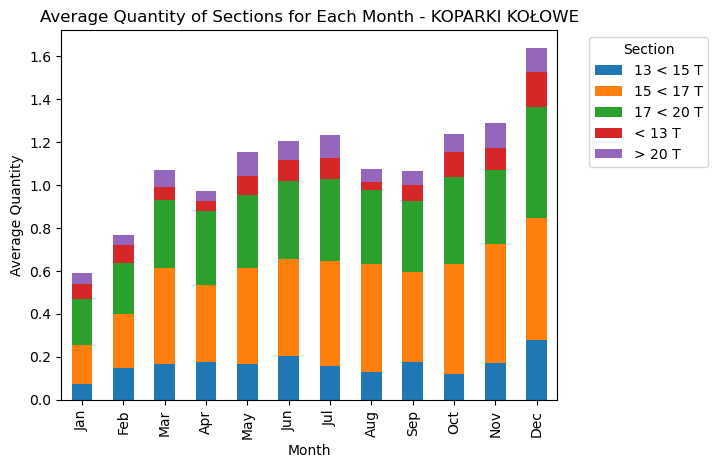

<Figure size 1200x800 with 0 Axes>

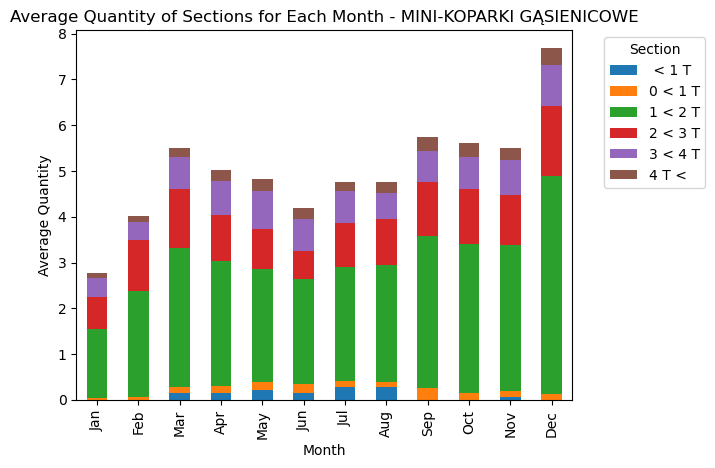

<Figure size 1200x800 with 0 Axes>

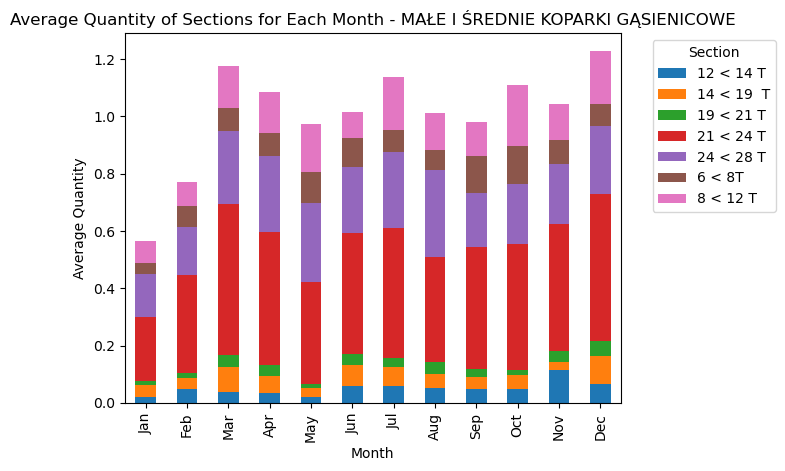

<Figure size 1200x800 with 0 Axes>

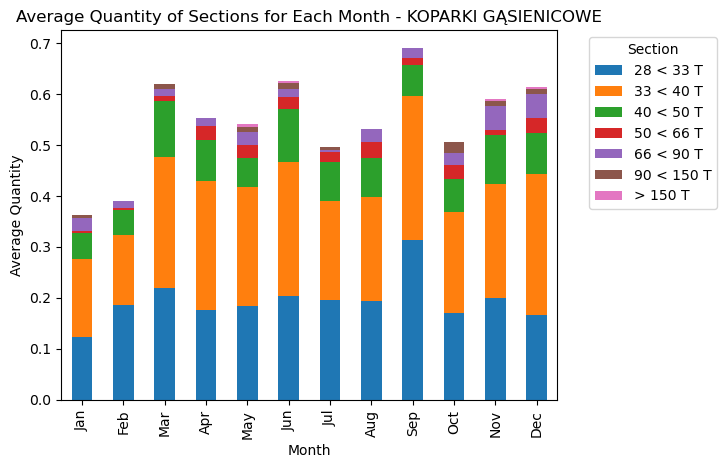

<Figure size 1200x800 with 0 Axes>

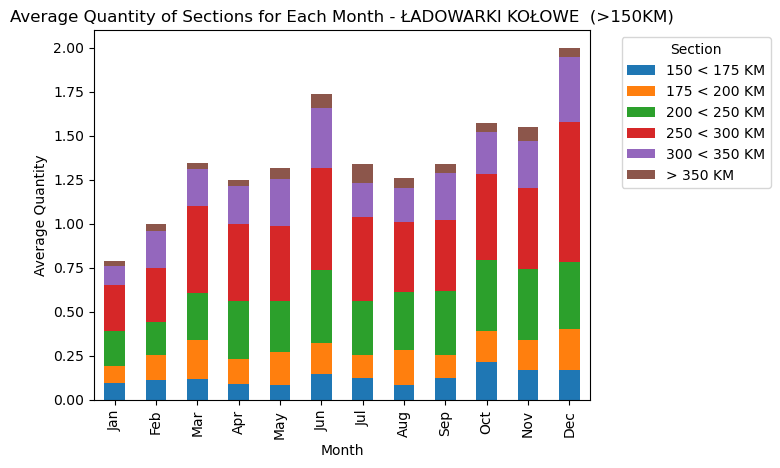

In [82]:
# Iterate through unique types and create a separate bar plot for each type
unique_types = complete_df['type'].unique()
for machine_type in unique_types:
    type_data = complete_df[complete_df['type'] == machine_type]
    
    # Calculate the average quantity for each month and section
    avg_quantity = type_data.groupby(['month', 'section'])['quantity'].mean().unstack()

    plt.figure(figsize=(12, 8))
    avg_quantity.plot(kind='bar', stacked=True)
    plt.xlabel('Month')
    plt.ylabel('Average Quantity')
    plt.title(f'Average Quantity of Sections for Each Month - {machine_type}')
    plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Section', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

<Figure size 1200x800 with 0 Axes>

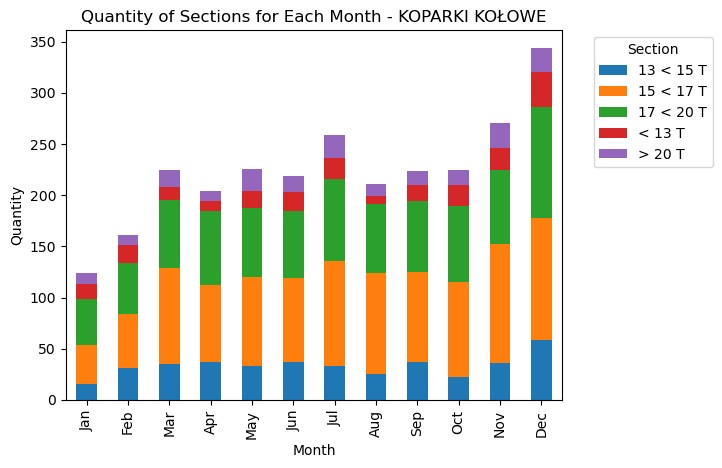

<Figure size 1200x800 with 0 Axes>

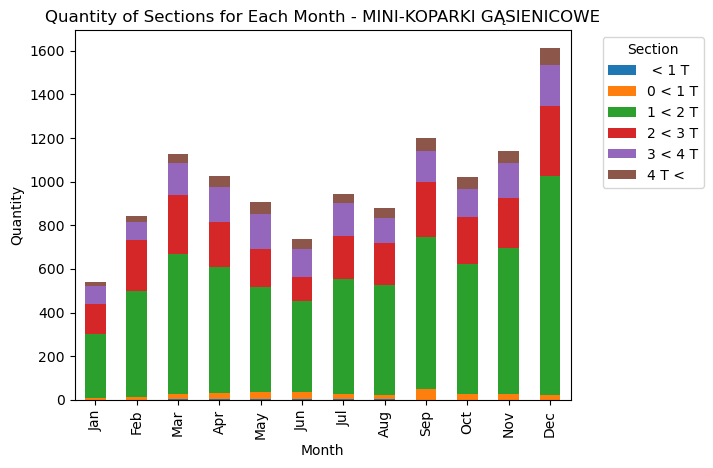

<Figure size 1200x800 with 0 Axes>

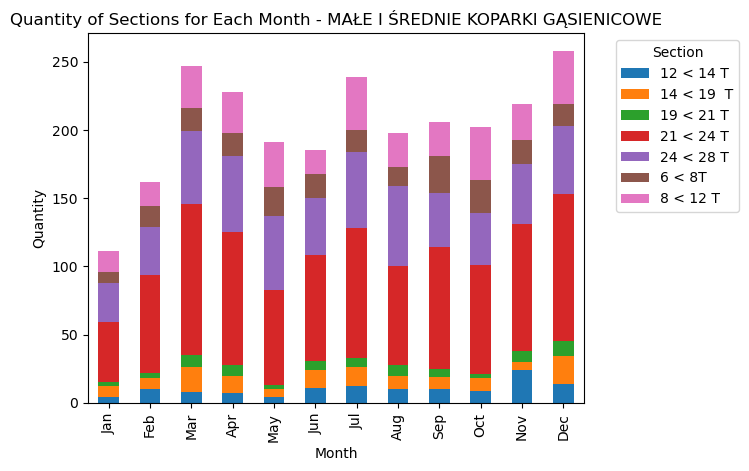

<Figure size 1200x800 with 0 Axes>

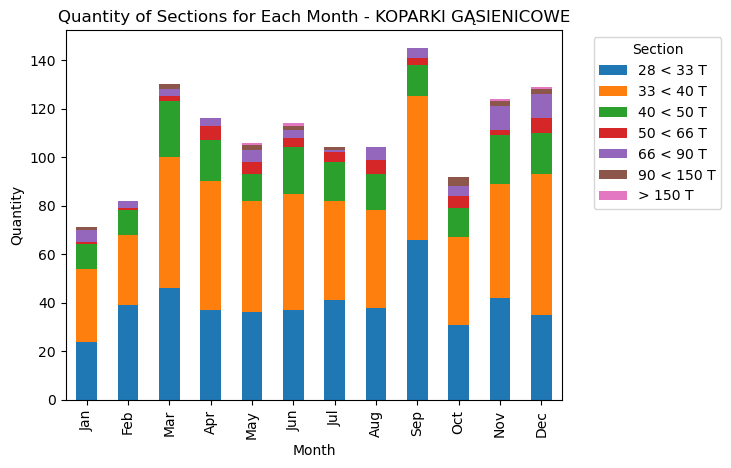

<Figure size 1200x800 with 0 Axes>

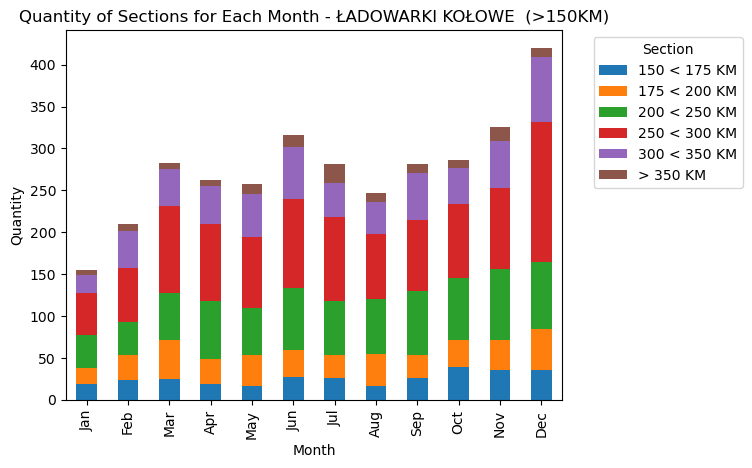

In [130]:
# Iterate through unique types and create a separate bar plot for each type
unique_types = complete_df['type'].unique()
for machine_type in unique_types:
    type_data = complete_df[complete_df['type'] == machine_type]
    
    # Calculate the average quantity for each month and section
    avg_quantity = type_data.groupby(['month', 'section'])['quantity'].sum().unstack()

    plt.figure(figsize=(12, 8))
    avg_quantity.plot(kind='bar', stacked=True)
    plt.xlabel('Month')
    plt.ylabel('Quantity')
    plt.title(f'Quantity of Sections for Each Month - {machine_type}')
    plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Section', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

<Figure size 1200x800 with 0 Axes>

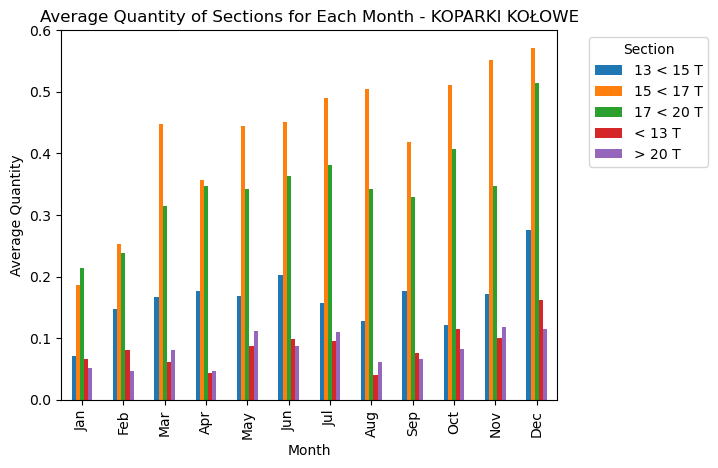

<Figure size 1200x800 with 0 Axes>

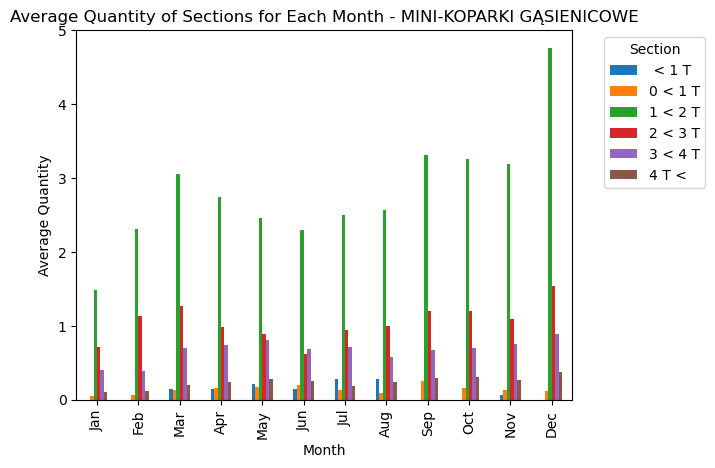

<Figure size 1200x800 with 0 Axes>

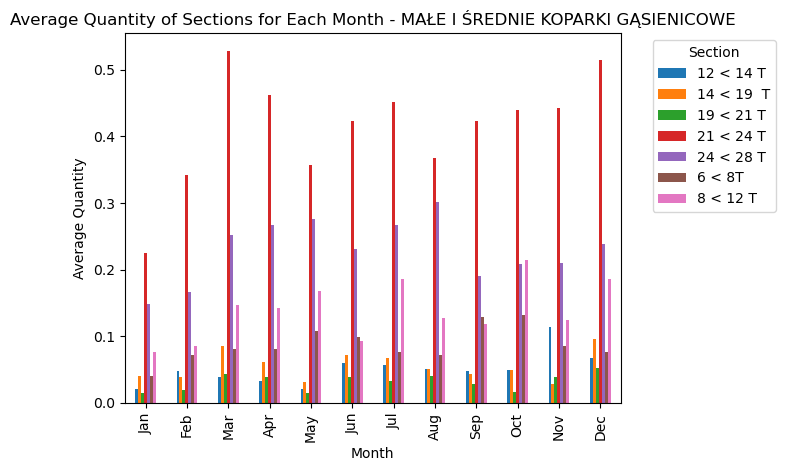

<Figure size 1200x800 with 0 Axes>

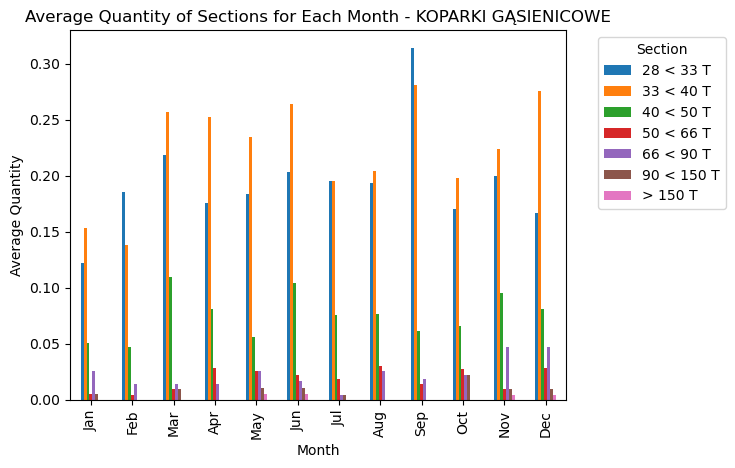

<Figure size 1200x800 with 0 Axes>

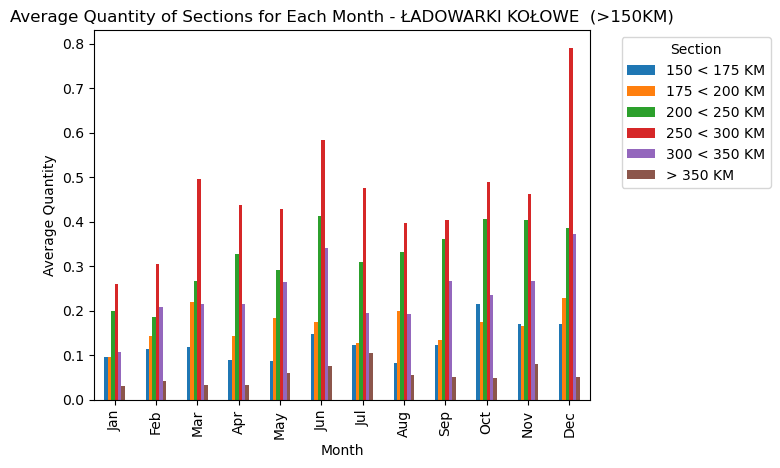

In [84]:
unique_types = complete_df['type'].unique()
for machine_type in unique_types:
    type_data = complete_df[complete_df['type'] == machine_type]
    
    avg_quantity = type_data.groupby(['month', 'section'])['quantity'].mean().unstack()

    plt.figure(figsize=(12, 8))
    avg_quantity.plot(kind='bar')
    plt.xlabel('Month')
    plt.ylabel('Average Quantity')
    plt.title(f'Average Quantity of Sections for Each Month - {machine_type}')
    plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Section', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

<Figure size 1200x800 with 0 Axes>

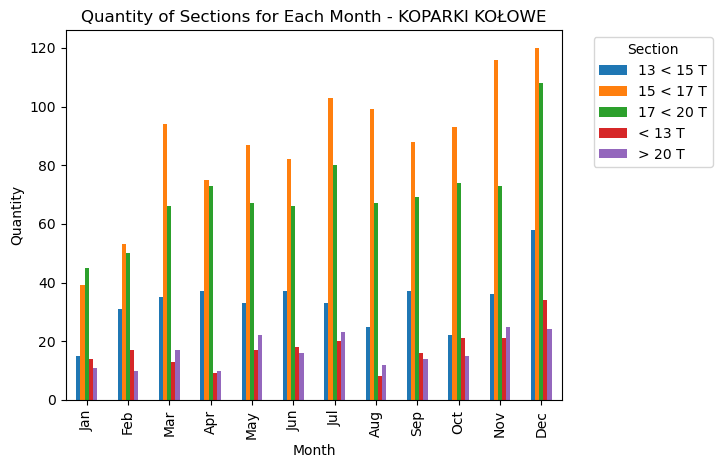

<Figure size 1200x800 with 0 Axes>

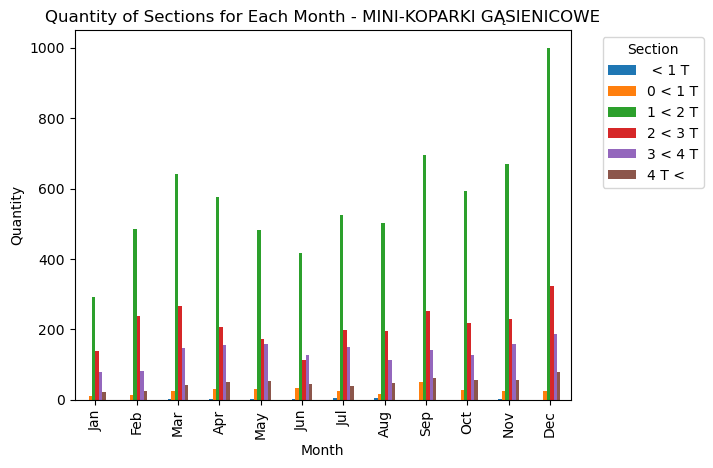

<Figure size 1200x800 with 0 Axes>

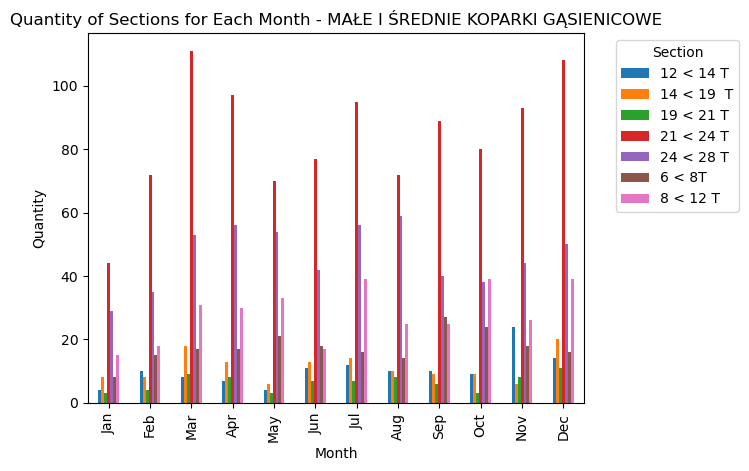

<Figure size 1200x800 with 0 Axes>

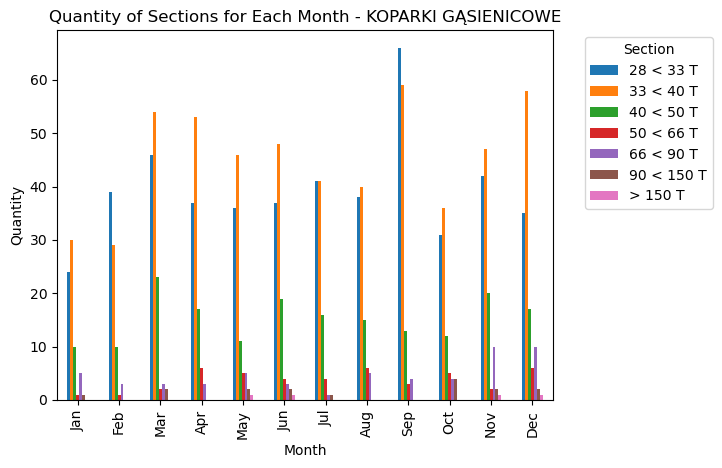

<Figure size 1200x800 with 0 Axes>

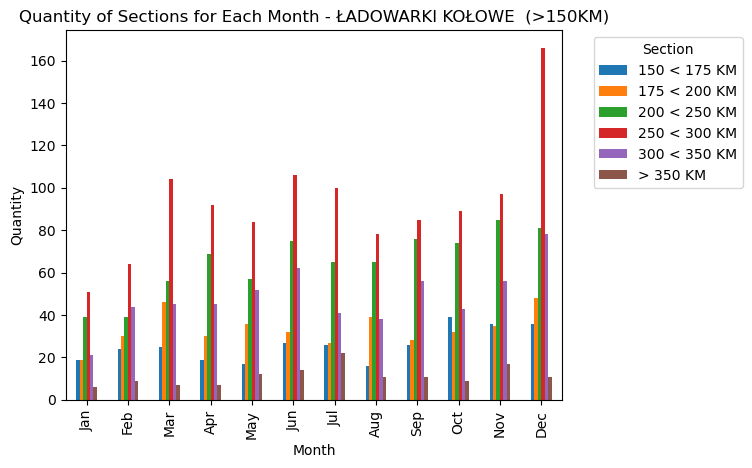

In [134]:
unique_types = complete_df['type'].unique()
for machine_type in unique_types:
    type_data = complete_df[complete_df['type'] == machine_type]
    
    avg_quantity = type_data.groupby(['month', 'section'])['quantity'].sum().unstack()

    plt.figure(figsize=(12, 8))
    avg_quantity.plot(kind='bar')
    plt.xlabel('Month')
    plt.ylabel('Quantity')
    plt.title(f'Quantity of Sections for Each Month - {machine_type}')
    plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Section', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

<Figure size 1200x800 with 0 Axes>

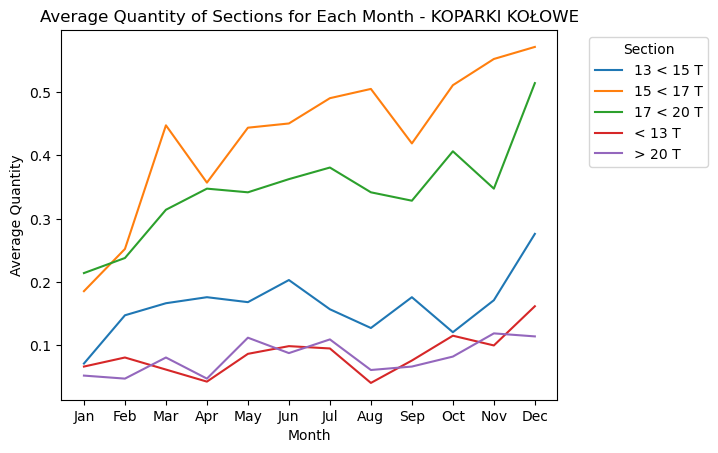

<Figure size 1200x800 with 0 Axes>

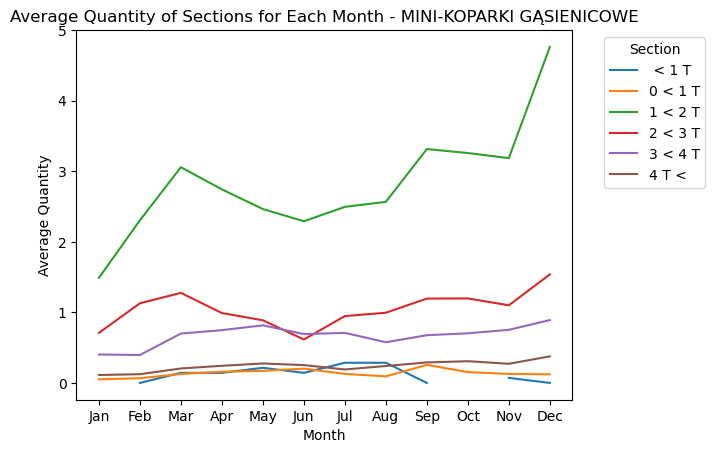

<Figure size 1200x800 with 0 Axes>

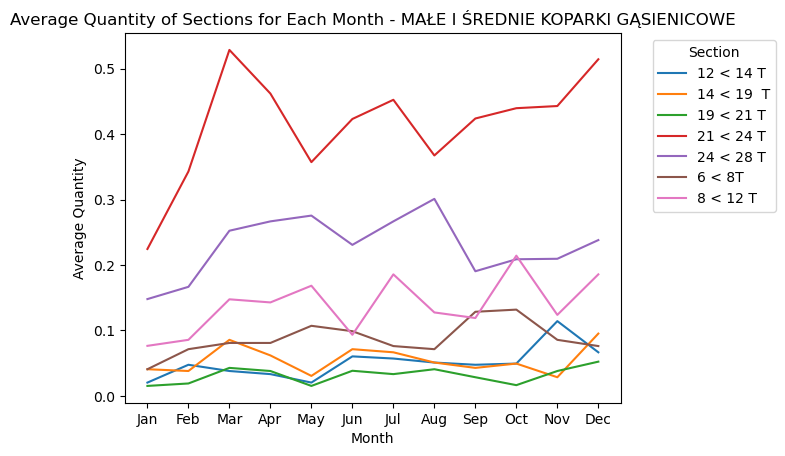

<Figure size 1200x800 with 0 Axes>

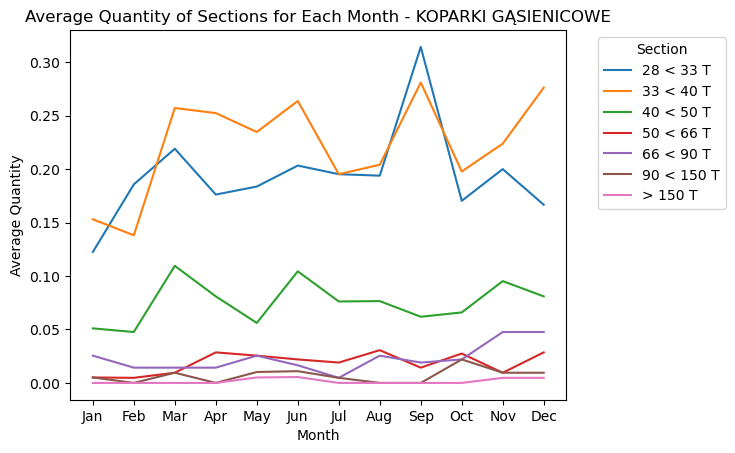

<Figure size 1200x800 with 0 Axes>

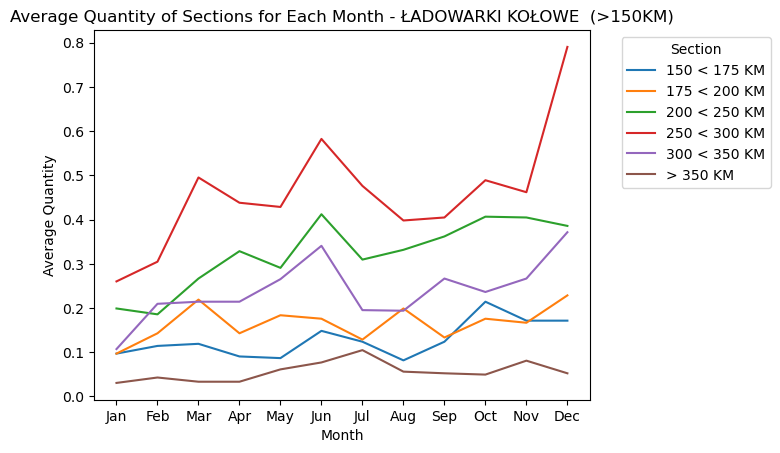

In [152]:
unique_types = complete_df['type'].unique()
for machine_type in unique_types:
    type_data = complete_df[complete_df['type'] == machine_type]
    
    avg_quantity = type_data.groupby(['month', 'section'])['quantity'].mean().unstack()

    plt.figure(figsize=(12, 8))
    avg_quantity.plot(kind='line')
    plt.xlabel('Month')
    plt.ylabel('Average Quantity')
    plt.title(f'Average Quantity of Sections for Each Month - {machine_type}')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Section', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

<Figure size 1200x800 with 0 Axes>

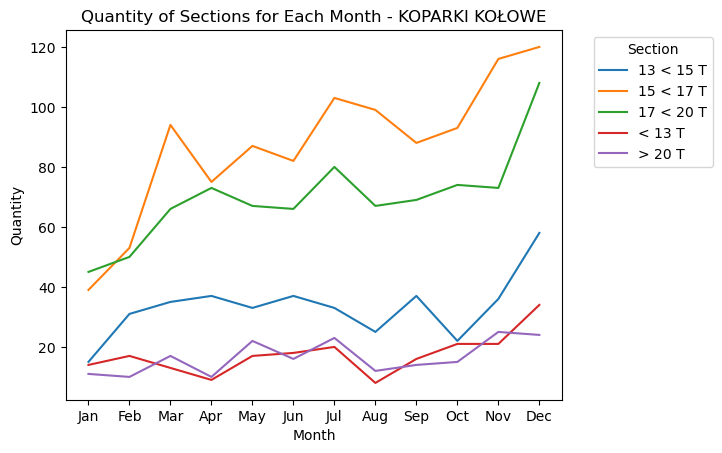

<Figure size 1200x800 with 0 Axes>

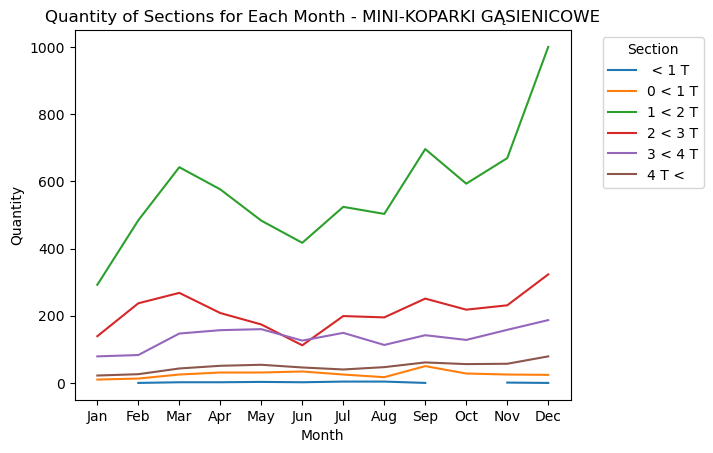

<Figure size 1200x800 with 0 Axes>

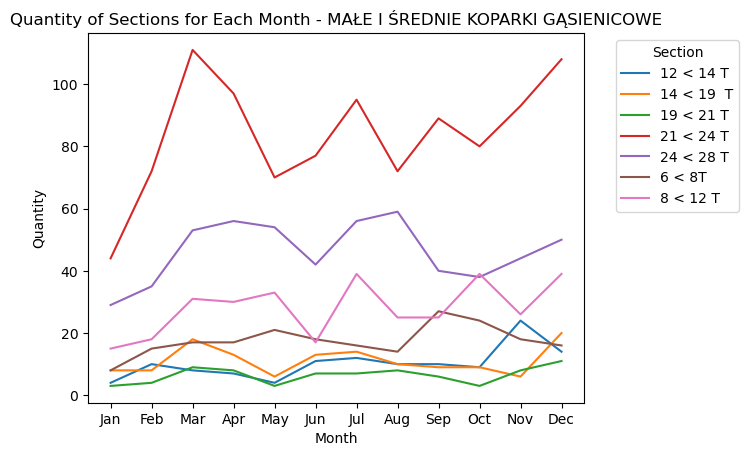

<Figure size 1200x800 with 0 Axes>

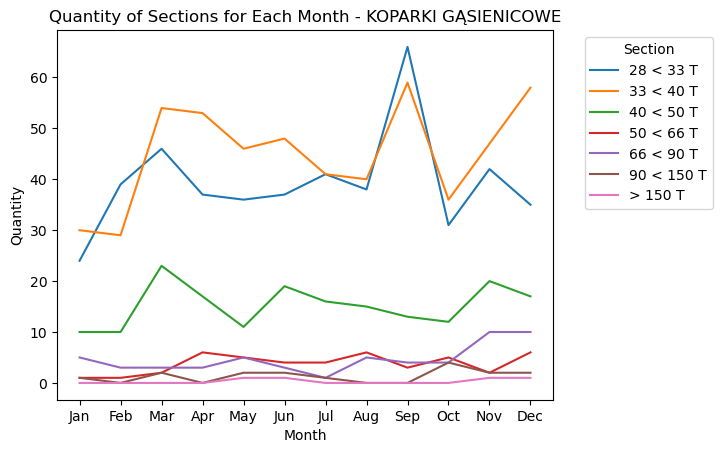

<Figure size 1200x800 with 0 Axes>

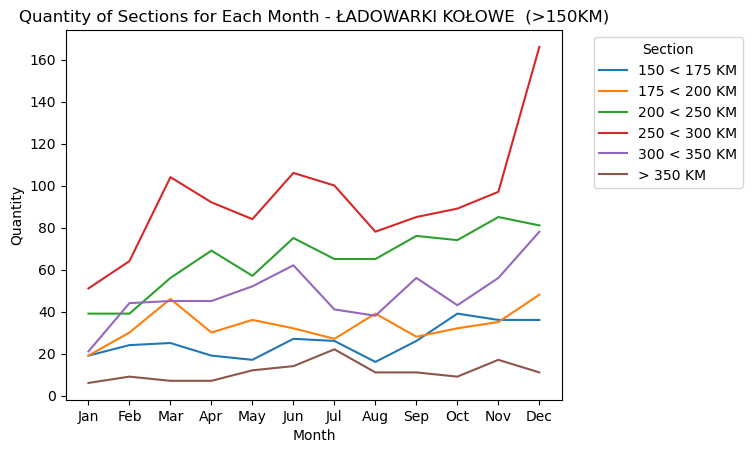

In [150]:
unique_types = complete_df['type'].unique()
for machine_type in unique_types:
    type_data = complete_df[complete_df['type'] == machine_type]
    
    avg_quantity = type_data.groupby(['month', 'section'])['quantity'].sum().unstack()

    plt.figure(figsize=(12, 8))
    avg_quantity.plot(kind='line')
    plt.xlabel('Month')
    plt.ylabel('Quantity')
    plt.title(f'Quantity of Sections for Each Month - {machine_type}')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Section', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

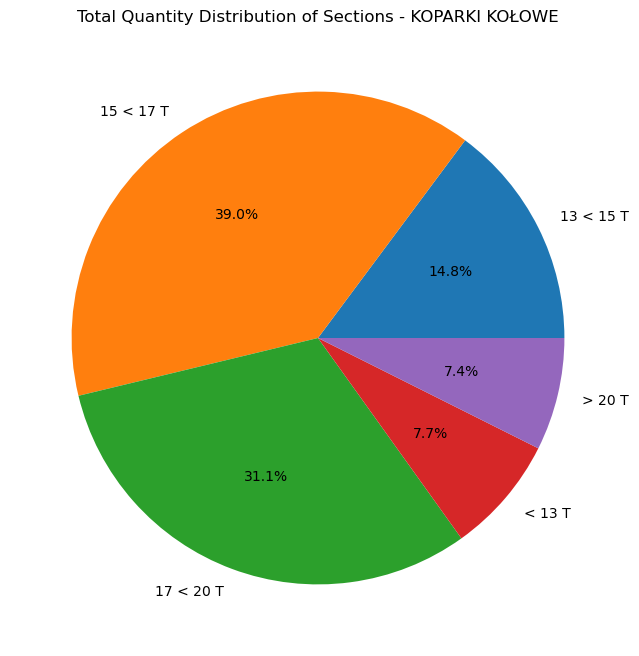

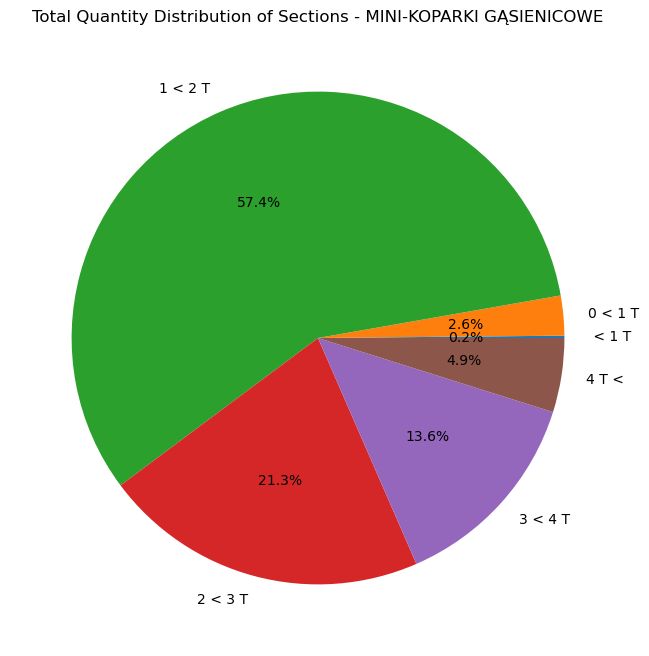

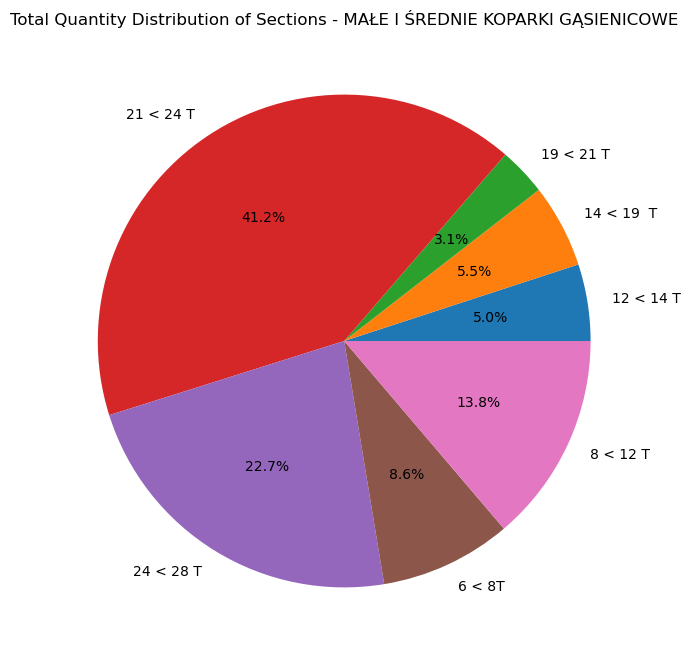

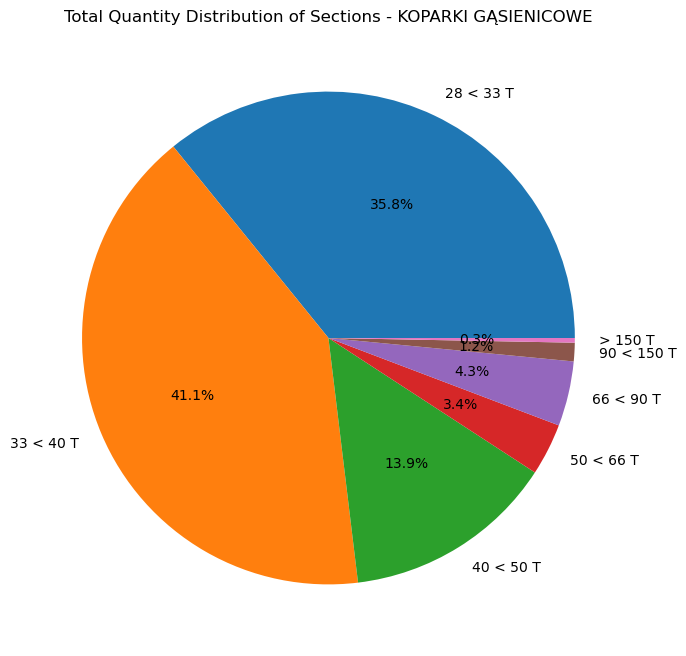

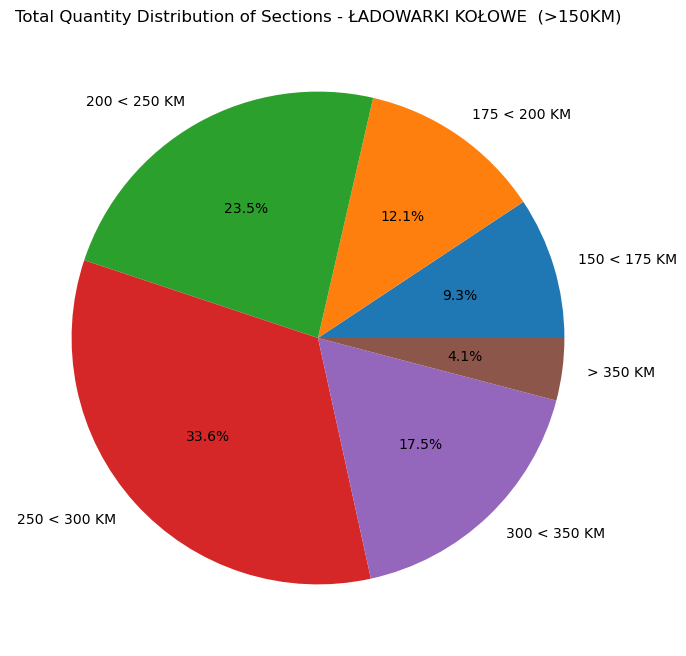

In [92]:
unique_types = complete_df['type'].unique()
for machine_type in unique_types:
    type_data = complete_df[complete_df['type'] == machine_type]
    
    total_quantity = type_data.groupby('section')['quantity'].sum()

    plt.figure(figsize=(8, 8))
    plt.pie(total_quantity, labels=total_quantity.index, autopct='%1.1f%%')
    plt.title(f'Total Quantity Distribution of Sections - {machine_type}')
    plt.show()

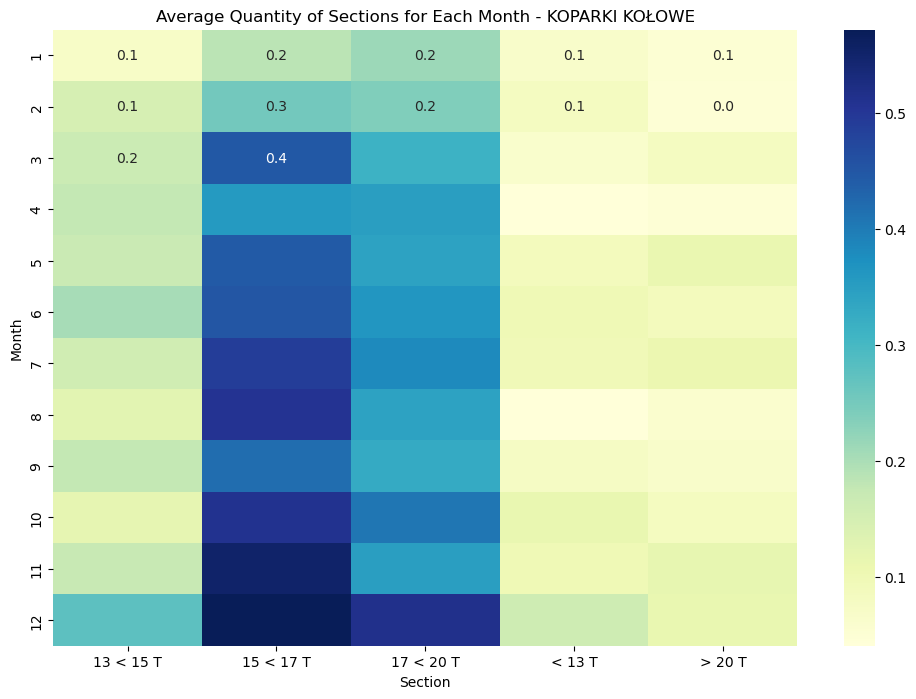

/Users/dominikrajczak/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


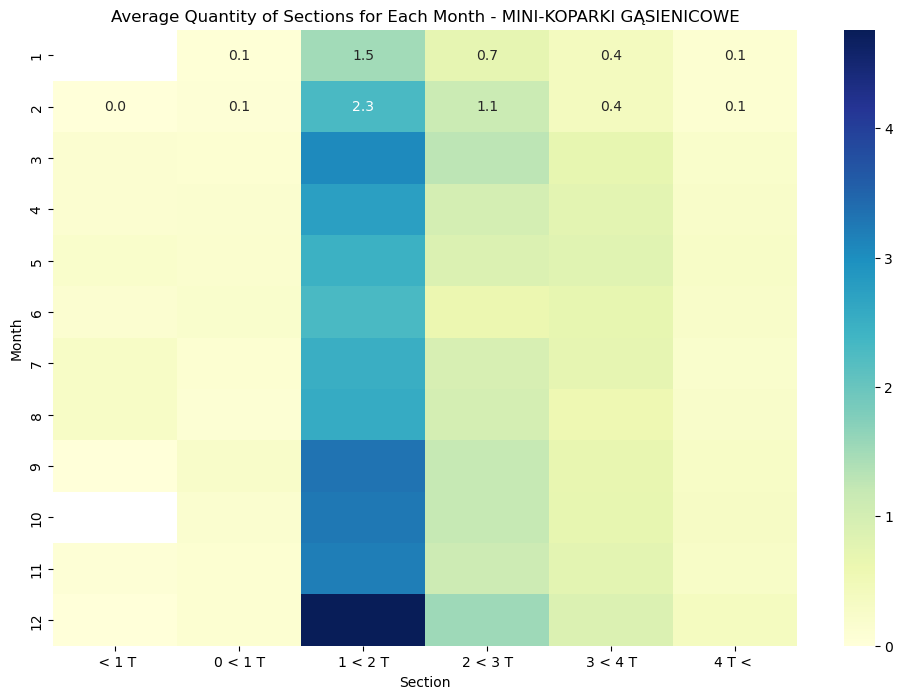

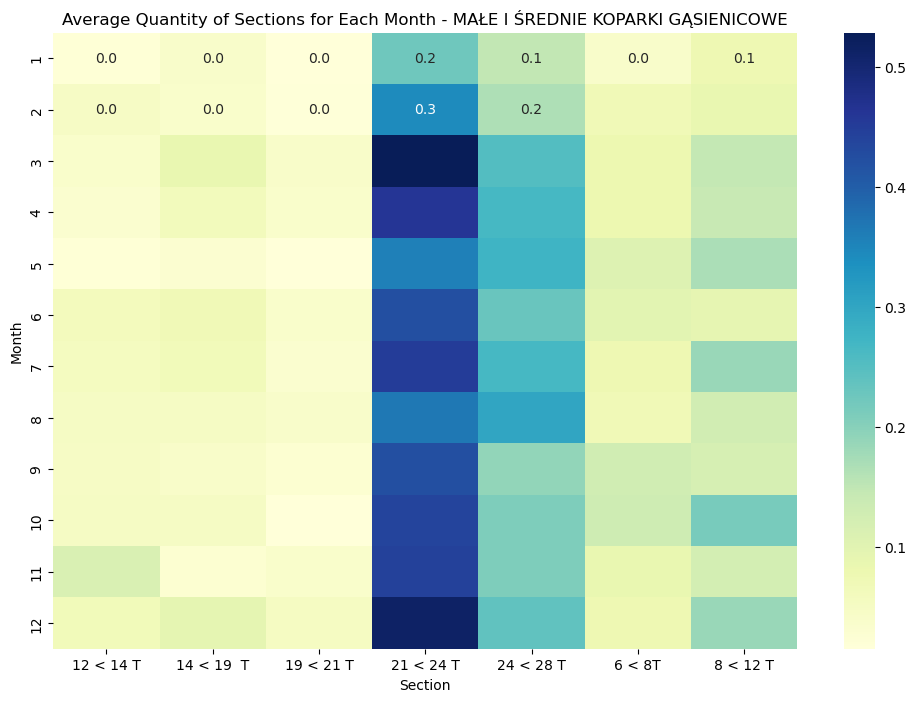

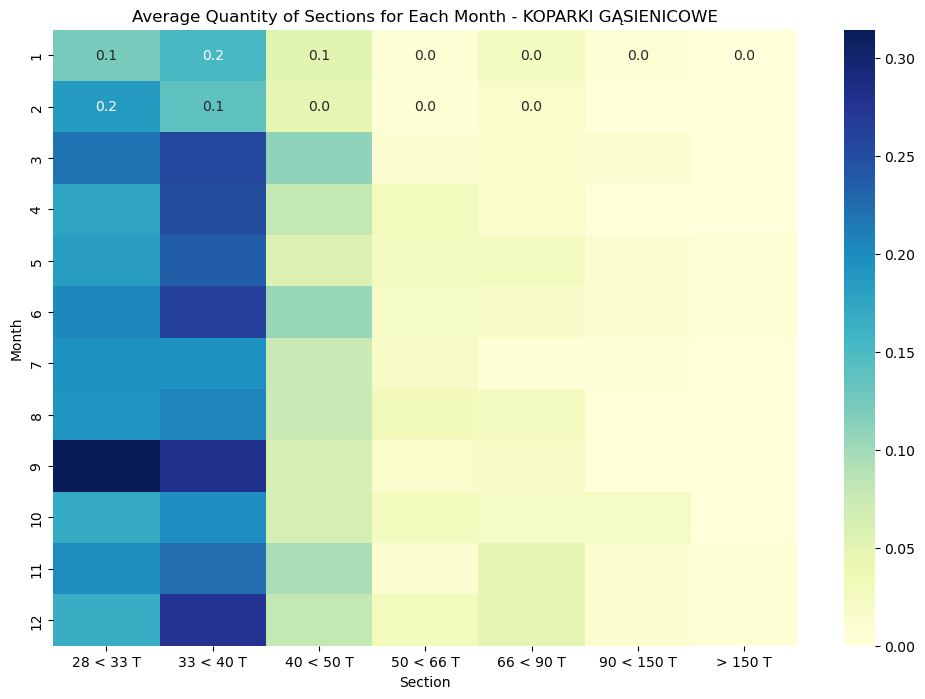

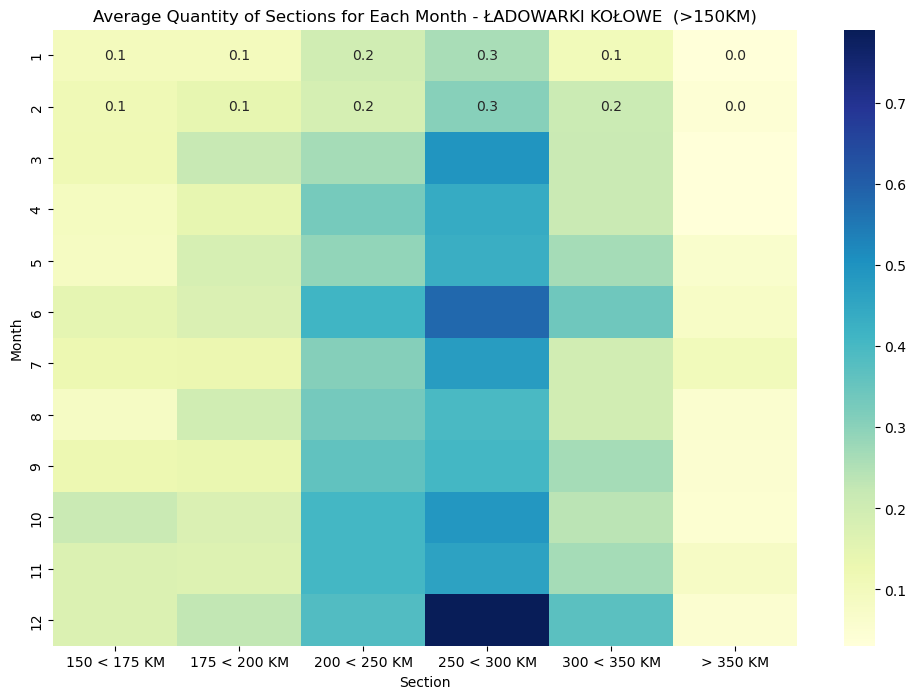

In [120]:
import seaborn as sns

unique_types = complete_df['type'].unique()
for machine_type in unique_types:
    type_data = complete_df[complete_df['type'] == machine_type]
    
    avg_quantity = type_data.groupby(['month', 'section'])['quantity'].mean().unstack()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(avg_quantity, cmap='YlGnBu', annot=True, fmt=".1f")
    plt.xlabel('Section')
    plt.ylabel('Month')
    plt.title(f'Average Quantity of Sections for Each Month - {machine_type}')
    plt.show()

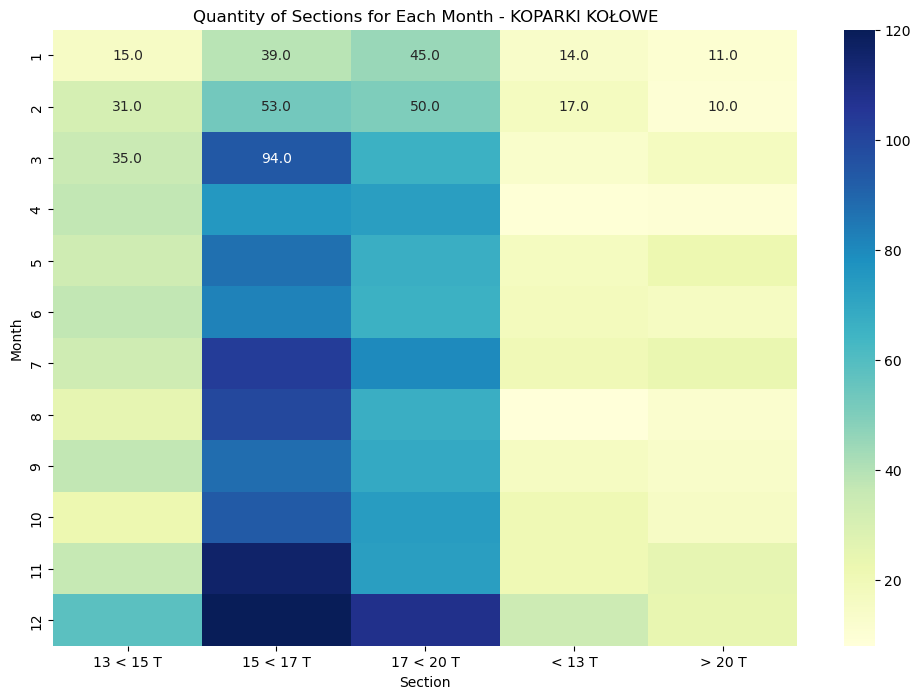

/Users/dominikrajczak/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


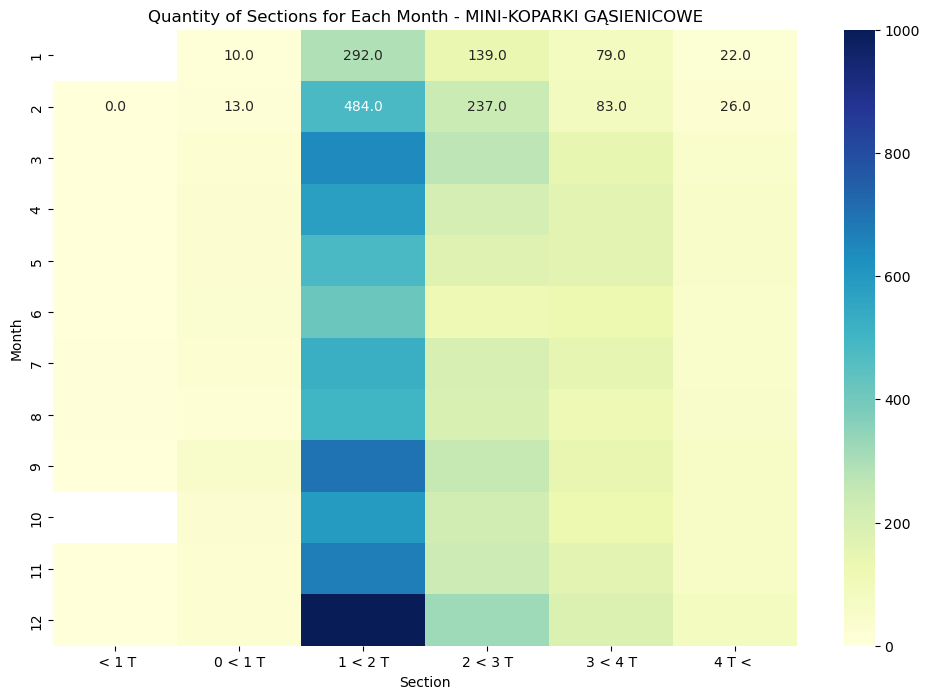

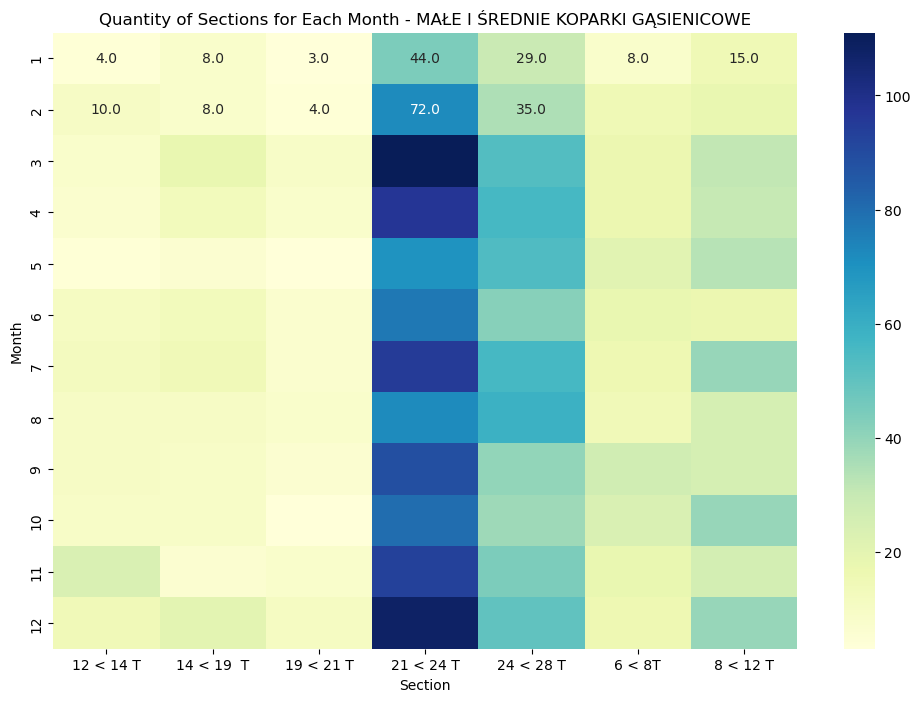

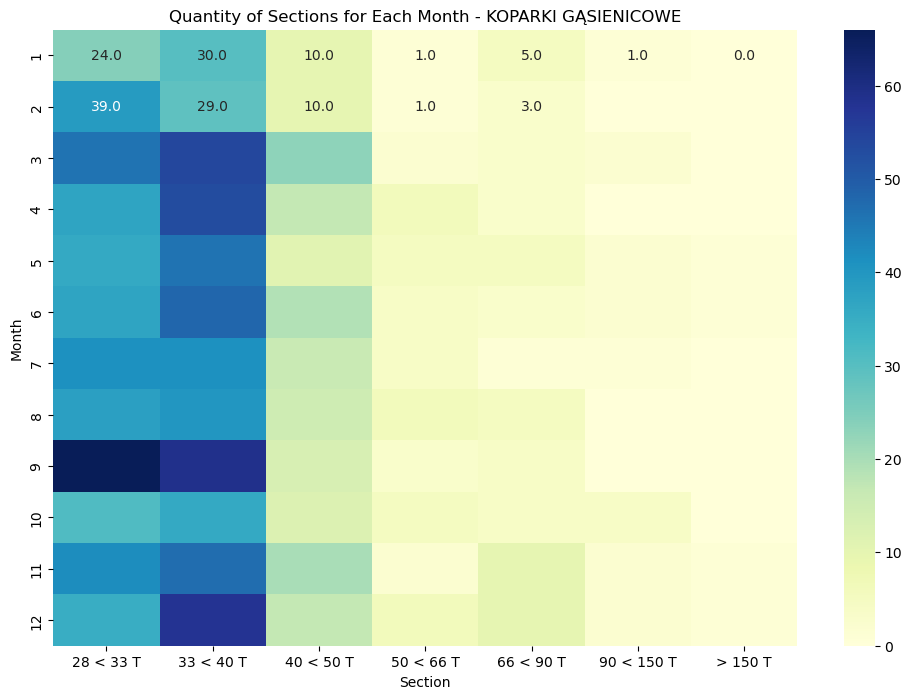

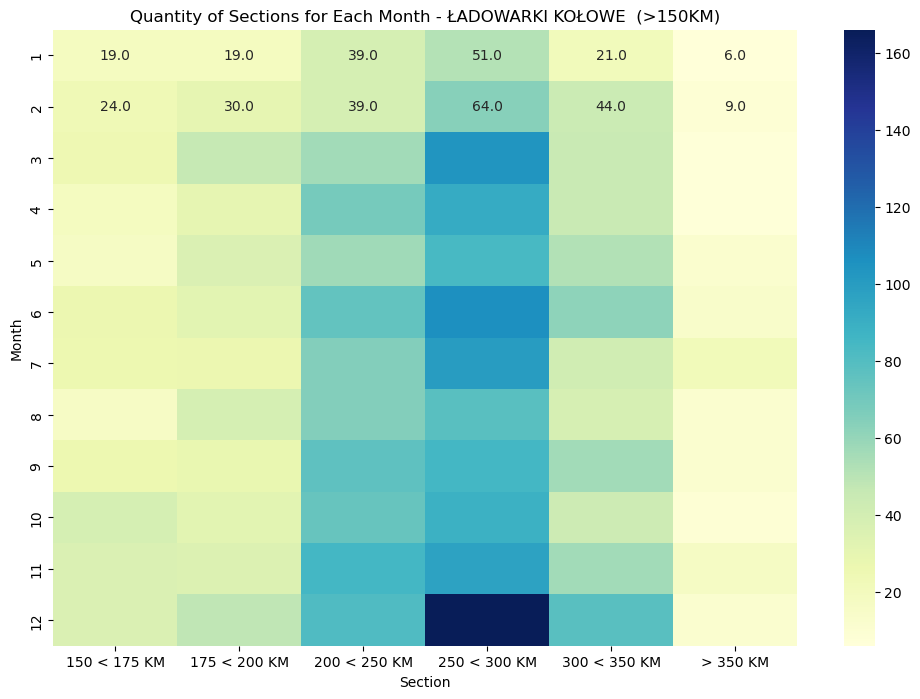

In [142]:
import seaborn as sns

unique_types = complete_df['type'].unique()
for machine_type in unique_types:
    type_data = complete_df[complete_df['type'] == machine_type]
    
    avg_quantity = type_data.groupby(['month', 'section'])['quantity'].sum().unstack()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(avg_quantity, cmap='YlGnBu', annot=True, fmt=".1f")
    plt.xlabel('Section')
    plt.ylabel('Month')
    plt.title(f'Quantity of Sections for Each Month - {machine_type}')
    plt.show()

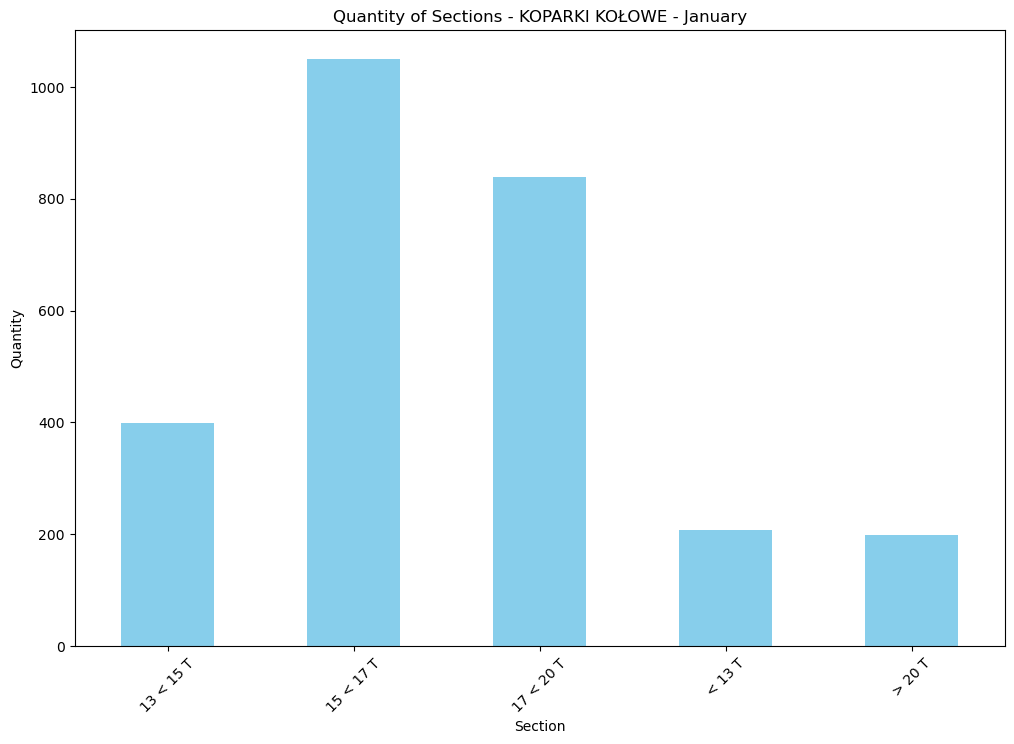

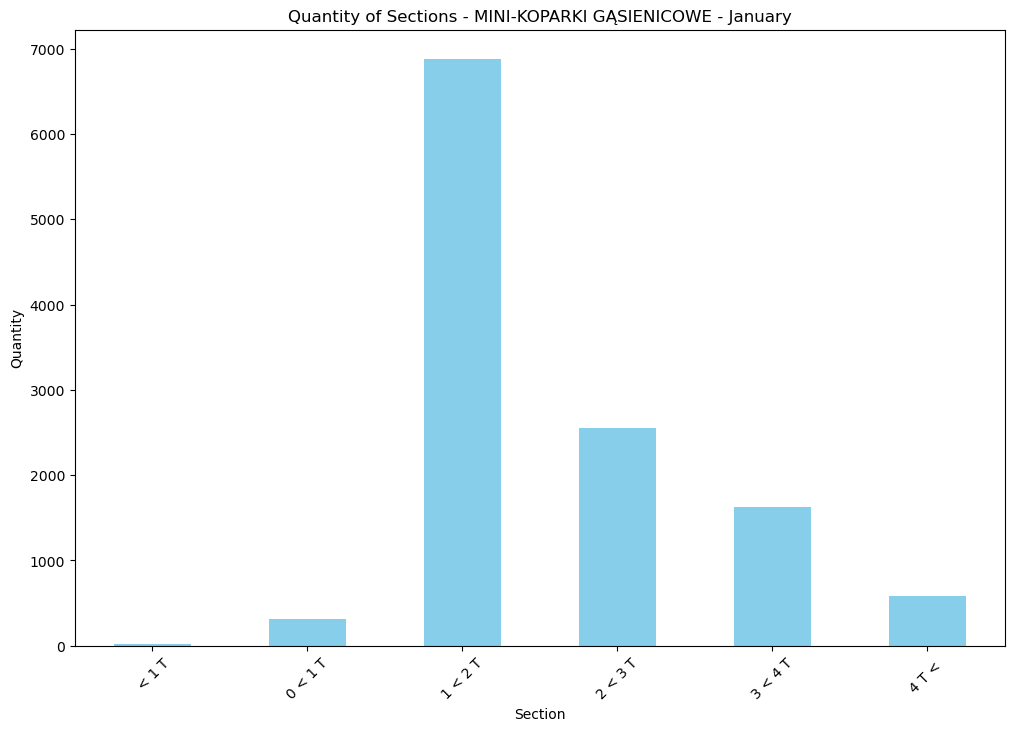

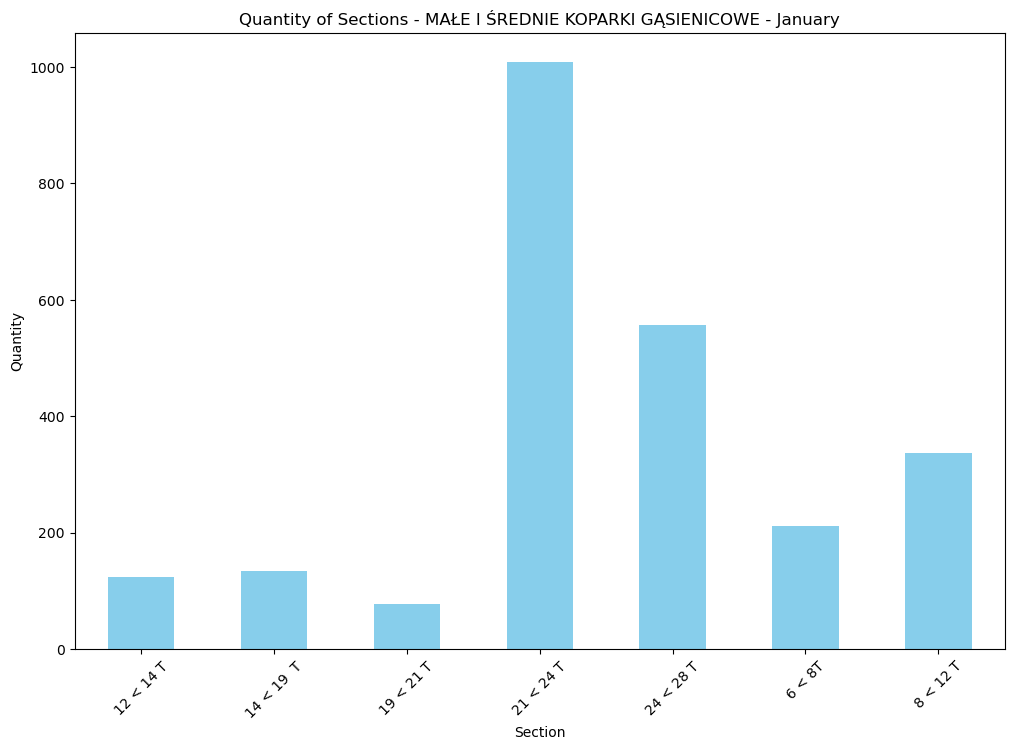

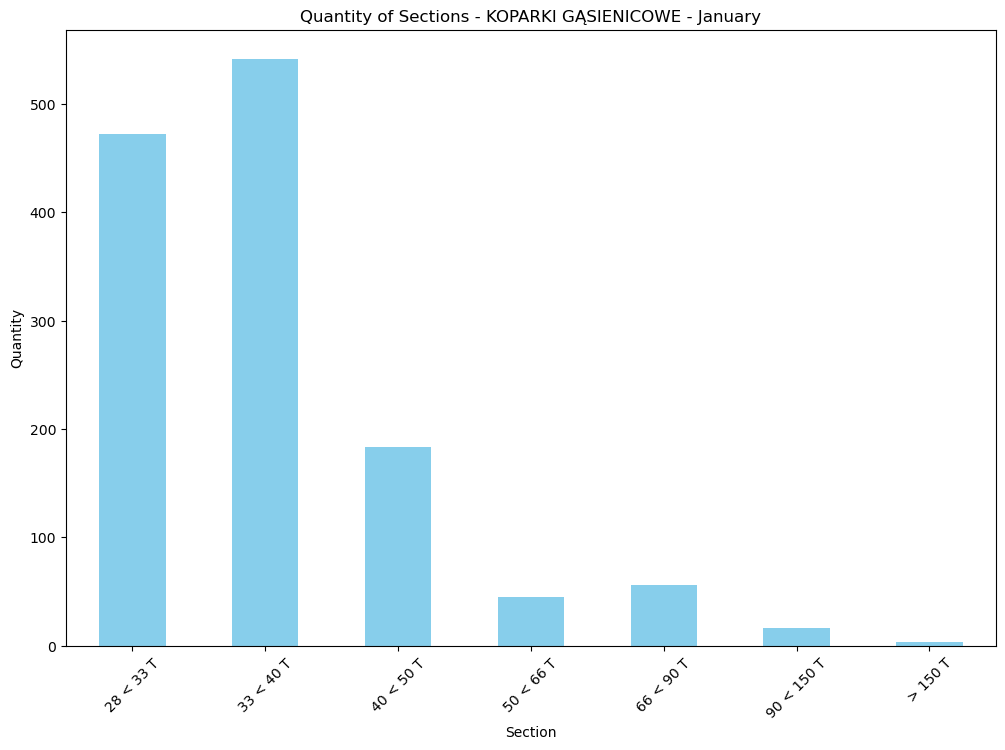

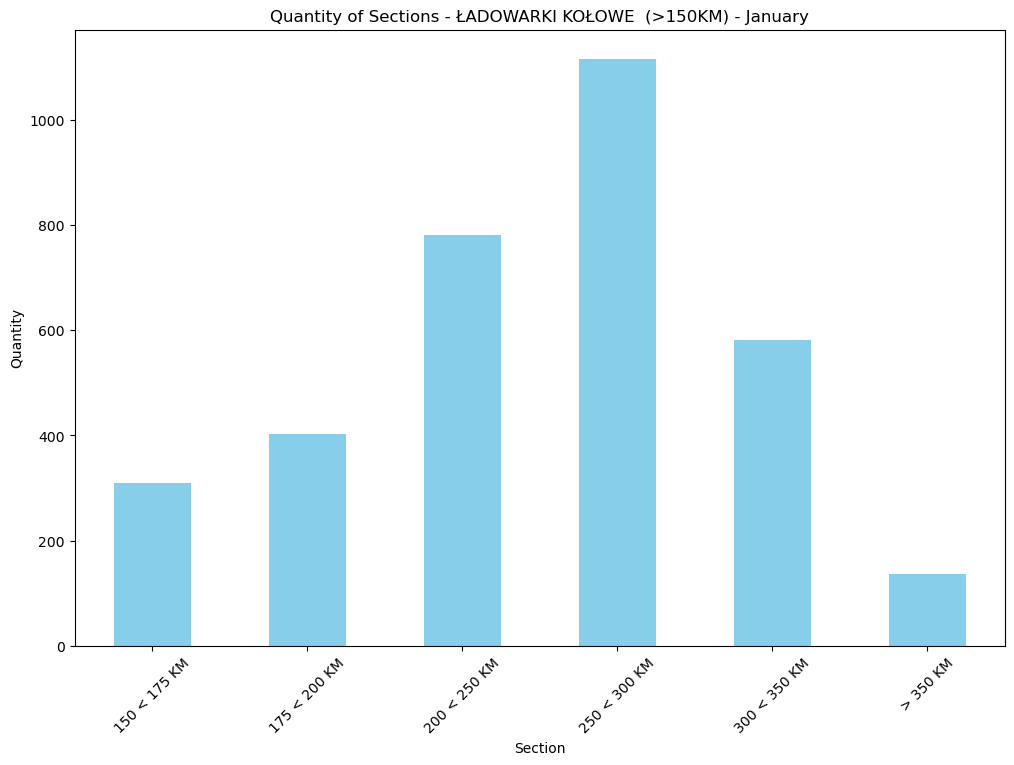

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'month' is a datetime column
complete_df['month'] = pd.to_datetime(complete_df['month'])

unique_types = complete_df['type'].unique()

for machine_type in unique_types:
    type_data = complete_df[complete_df['type'] == machine_type]
    
    unique_months = type_data['month'].dt.month_name().unique()

    for month in unique_months:
        month_data = type_data[type_data['month'].dt.month_name() == month]
        avg_quantity = month_data.groupby('section')['quantity'].sum()

        plt.figure(figsize=(12, 8))
        avg_quantity.plot(kind='bar', color='skyblue')
        plt.xlabel('Section')
        plt.ylabel('Quantity')
        plt.title(f'Quantity of Sections - {machine_type} - {month}')
        plt.xticks(rotation=45)
        plt.show()
